# 3 - Ensemble Learning

In [319]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.metrics import  precision_score, recall_score, f1_score, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# seeding
random.seed(42)
np.random.seed(42)

In [3]:
# Clasification datatset
wine_data = pd.read_csv('./data/WineQT.csv') 
wine_data = wine_data.drop('Id', axis = 1)

wine_data.dropna(inplace=True)

wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [4]:
# diving into train, val and test
wine_X = wine_data.drop('quality', axis = 1)
wine_y = wine_data['quality'].to_numpy()

scaler = StandardScaler()
wine_X = scaler.fit_transform(wine_X)

wine_X_train, wine_X_temp, wine_y_train, wine_y_temp = train_test_split(wine_X, wine_y, 
                                                                        test_size = 0.3, 
                                                                        random_state= 42)

wine_X_val, wine_X_test, wine_y_val, wine_y_test = train_test_split(wine_X_temp, wine_y_temp, 
                                                                        test_size = 0.5, 
                                                                        random_state= 42)

len(wine_X_train), len(wine_X_val), len(wine_X_test)

(800, 171, 172)

In [5]:
# Regression dataset
hous_data = pd.read_csv('./data/HousingData.csv')

hous_data.dropna(inplace=True)

hous_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [6]:
# diving into train, val and test

scaler = StandardScaler()
hous_data = scaler.fit_transform(hous_data)

hous_X = hous_data[:, :-1]
hous_y = hous_data[:, -1]


hous_X_train, hous_X_temp, hous_y_train, hous_y_temp = train_test_split(hous_X, hous_y, 
                                                                        test_size = 0.2, 
                                                                        random_state= 42)

hous_X_val, hous_X_test, hous_y_val, hous_y_test = train_test_split(hous_X_temp, hous_y_temp, 
                                                                        test_size = 0.5, 
                                                                        random_state= 42)

len(hous_X_train), len(hous_X_val), len(hous_X_test)

(315, 39, 40)

## Pre-Requisite

### Decision Trees

In [7]:
# Classification Decision Tree

'''
tuning conditions
criteria = ['gini', 'entropy']
max_depth_values = [None, 5, 10, 15, 20]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]
'''


opt_DT_classifier = DecisionTreeClassifier(random_state=42, # after tuning over multiple things
                    criterion='gini',
                    max_depth=5,
                    min_samples_split=5,
                    min_samples_leaf=2
                    )

opt_DT_classifier.fit(wine_X_train, wine_y_train)

wine_y_pred = opt_DT_classifier.predict(wine_X_val)

accuracy = accuracy_score(wine_y_val, wine_y_pred)
report = classification_report(wine_y_val, wine_y_pred, zero_division=0)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.63      0.82      0.71        62
           6       0.64      0.58      0.61        81
           7       0.44      0.29      0.35        24
           8       0.00      0.00      0.00         1

    accuracy                           0.61       171
   macro avg       0.34      0.34      0.33       171
weighted avg       0.59      0.61      0.60       171



In [8]:
# Regression Decision Tree

'''
Tuning conditions
max_depth_values = [None, 5, 10, 15, 20]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]
'''

opt_DT_regressor = DecisionTreeRegressor(random_state=42, # after tuning over multiple conditions
                    max_depth=20,
                    min_samples_split=2,
                    min_samples_leaf=1
                    )

opt_DT_regressor.fit(hous_X_train, hous_y_train)

hous_y_pred = opt_DT_regressor.predict(hous_X_test)

mse = mean_squared_error(hous_y_test, hous_y_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.34


### Logistic Regression

In [9]:
class LogisticRegression():
    def __init__(self, features, labels, num_classes = None, num_epochs = 1000, lr = 0.1):
        self.features = features
        self.labels = labels
        self.num_epochs = num_epochs
        self.lr = lr
        
        self.num_classes = num_classes # included as training data may not contain all possible labels
            
        if self.num_classes == None:
            self.num_classes = len(np.unique(self.labels))
        
        
        self.num_samples = len(features)
        self.num_features = features.shape[1]
        self.actual_prob, self.ohe_dict = self.ohe(self.labels)
    
    def init_params(self):
        self.weights = np.random.rand(self.num_features, self.num_classes)
        self.biases = np.random.rand(self.num_classes)
        
    def softmax(self, matrix):
        exp_matrix = np.exp(matrix)
        return exp_matrix / np.sum(exp_matrix, axis = 1)[:, np.newaxis]
    
    def ohe(self, data):
        unique_data = np.unique(data)
        ohe = {}
        for i in range(len(unique_data)):
            cur_enc = [0] * len(unique_data)
            cur_enc[i] = 1
            ohe[unique_data[i]] = cur_enc
            
        ret_data = []
        for i in data:
            ret_data.append(ohe[i])
            
        return np.array(ret_data), ohe
    
    def log_loss(self, actual_prob, pred_probs):
        return np.sum(-actual_prob * np.log(pred_probs))
    
    def grad_desc(self, actual_prob, pred_probs):
        prob_diff = actual_prob - pred_probs
        
        # updaing parameters
        self.weights += self.lr * (self.features.T @ prob_diff / self.num_samples)
        self.biases += self.lr * (np.sum(prob_diff, axis = 0) / self.num_samples)
        
    def predict(self, features):
        pred_probs = self.softmax(features @ self.weights + self.biases)        
        pred_class_index = np.argmax(pred_probs, axis=1)

        pred_classes = []
        for ind in pred_class_index:
            for cur_class in self.ohe_dict:
                if self.ohe_dict[cur_class][ind] == 1:
                    pred_classes.append(cur_class)
        
        return np.array(pred_classes)
    
    def predict_proba(self, features):
        return self.softmax(features @ self.weights + self.biases)
        
    def fit(self, print_per_epoch = False, print_discreteness = 100, validation_features = None, validation_labels = None, print_validation_metrics = True, wandb_en = False):
        self.init_params()
        
        if validation_labels is not None:
            actual_prob_validation = np.array([self.ohe_dict[i] for i in validation_labels])
                    
        for epoch in range(1, self.num_epochs+1):
            pre_soft_probs = self.features @ self.weights + self.biases
            pred_probs = self.softmax(pre_soft_probs)
            
            # calculating loss
            training_loss = self.log_loss(self.actual_prob, pred_probs)
                                    
            if print_per_epoch and epoch%print_discreteness == 0:
                print("Epoch {}: total training loss is {}".format(epoch, training_loss))
                
            # printing loss for validation set
            if validation_features is not None and validation_labels is not None and epoch%print_discreteness == 0:
                pre_soft_probs_validation = validation_features @ self.weights + self.biases
                pred_probs_validation = self.softmax(pre_soft_probs_validation)
                
                validation_loss = self.log_loss(actual_prob_validation, pred_probs_validation)
                
                
                
                # printing classification metrics
                predicted_validation_classes = self.predict(validation_features)
                classification_rep = classification_report(validation_labels, 
                                                           predicted_validation_classes,
                                                          zero_division = 0.0)
                
                if print_validation_metrics:
                    print("Epoch {}: total validation loss is {}".format(epoch, validation_loss))
                    print("Accuracy on validation set is {}".format(accuracy_score(validation_labels, predicted_validation_classes)))
                    print("Classification Report on Validation Set:")
                    print(classification_rep)
                    
                if wandb_en:
                    wandb.log({"acc": accuracy_score(validation_labels, predicted_validation_classes), "loss": validation_loss})
                
            self.grad_desc(self.actual_prob, pred_probs)

In [10]:
opt_log_reg = LogisticRegression(wine_X_train, wine_y_train, num_epochs = 5000, lr = 0.05)
opt_log_reg.fit(print_discreteness=10, validation_features=wine_X_val, 
          validation_labels=wine_y_val, print_validation_metrics = False, 
          wandb_en = False)

In [11]:
val_pred_classes = opt_log_reg.predict(wine_X_val)
val_pred_classes

array([7, 6, 6, 6, 7, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5,
       5, 6, 6, 6, 7, 5, 5, 6, 5, 5, 7, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 7,
       6, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 7, 5, 6, 5, 6, 5, 6, 6, 7, 6,
       7, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 7, 5, 5, 5, 6, 7, 5, 6, 5, 5, 5, 6, 5, 7, 6, 6, 5, 6, 5, 6, 5,
       5, 7, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 5])

In [12]:
classification_rep = classification_report(wine_y_val, 
                     val_pred_classes,
                     zero_division = 0.0)

print("\t\t For validation")
print(classification_rep)

		 For validation
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.62      0.77      0.69        62
           6       0.64      0.62      0.63        81
           7       0.60      0.38      0.46        24
           8       0.00      0.00      0.00         1

    accuracy                           0.63       171
   macro avg       0.37      0.35      0.36       171
weighted avg       0.61      0.63      0.61       171



### Linear Regressor

In [13]:
# Asked chatGPT - give me a class for a linear regressor from scratch in python that can fit and predict
class LinearRegressor:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = [0] * X.shape[1]
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Make predictions
            y_pred = self.predict(X)

            # Calculate errors
            errors = y_pred - y

            # Update weights and bias
            self.weights -= self.learning_rate * (1 / len(y)) * X.T.dot(errors)
            self.bias -= self.learning_rate * (1 / len(y)) * sum(errors)

    def predict(self, X):
        # Calculate predictions
        return X.dot(self.weights) + self.bias


In [14]:
opt_lin_reg = LinearRegressor(learning_rate=0.01, n_iterations=5000)
opt_lin_reg.fit(hous_X_train, hous_y_train)

hous_y_pred = opt_lin_reg.predict(hous_X_test)

mse = mean_squared_error(hous_y_test, hous_y_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.39


### MLP Classification

In [15]:
class MLPClassifier:
    def __init__(self, features, labels, num_classes = None, num_epochs = 1000, lr = 0.1, 
                hidden_layers = [64, 64], activation = 'sigmoid', 
                 optimization_technique = 'batch_grad_des'):
        self.features = features
        self.labels = labels
        self.num_epochs = num_epochs
        self.lr = lr
        self.num_classes = num_classes # included as training data may not contain all possible labels
            
        if self.num_classes == None:
            self.num_classes = len(np.unique(self.labels))
        
        self.num_samples = len(features)
        self.num_features = features.shape[1]
        self.actual_prob, self.ohe_dict = self.ohe(self.labels)
        
        # setting layers
        self.hidden_layers = hidden_layers
        self.layers = [self.num_features] + self.hidden_layers + [self.num_classes]
        
        # setting activation functions
        if activation == 'sigmoid':
            self.activation_func = self.sigmoid
            self.activation_func_der = self.sigmoid_der
        elif activation == 'tanh':
            self.activation_func = self.tanh
            self.activation_func_der = self.tanh_der
        elif activation == 'relu':
            self.activation_func = self.relu
            self.activation_func_der = self.relu_der
            
        # setting optimization function name
        self.optimization_technique = optimization_technique
        
    def init_params(self):               
        # setting model parameters
        self.weights, self.biases, self.activations = [], [], []
        
        # setting random weights and biases
        for i in range(len(self.layers) - 1):
            self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]))
            self.biases.append(np.random.randn(1, self.layers[i+1]))
            
            # setting up activations simultaneously
            self.activations.append(None)
        
    def ohe(self, data):
        unique_data = np.unique(data)
        ohe = {}
        for i in range(len(unique_data)):
            cur_enc = [0] * len(unique_data)
            cur_enc[i] = 1
            ohe[unique_data[i]] = cur_enc

        ret_data = []
        for i in data:
            ret_data.append(ohe[i])

        return np.array(ret_data), ohe
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid_der(self, x):
        return x * (1 - x)

    def tanh_der(self, x):
        return 1 - x**2

    def relu_der(self, x):
        return np.where(x > 0, 1, 0)
    
    def softmax(self, matrix):
        exp_matrix = np.exp(matrix)
        return exp_matrix / np.sum(exp_matrix, axis = 1)[:, np.newaxis]
    
    def log_loss(self, actual_prob, pred_probs):
        return np.sum(-actual_prob * np.log(pred_probs))
    
    def forward(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        self.activations[0] = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = self.activations[i] @ self.weights[i+1] + self.biases[i+1]
            self.activations[i+1] = self.activation_func(layer_enc)
            
    def backward(self, features, probs):
        error = probs - self.activations[-1]
        
        deltas = [error * self.activation_func_der(self.activations[-1])]
        
        for i in range(len(self.hidden_layers) - 1, -1, -1):
            error = deltas[-1] @ self.weights[i + 1].T
            delta = error * self.activation_func_der(self.activations[i])
            deltas.append(delta)
            
        deltas.reverse()
        
        for i in range(len(self.weights)):
            if i == 0:
                self.weights[i] += features.T @ deltas[i] * self.lr
            else:
                self.weights[i] += self.activations[i - 1].T @ deltas[i] * self.lr
            self.biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * self.lr
            
    def forward_no_grad(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        layer_activated = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = layer_activated @ self.weights[i+1] + self.biases[i+1]
            layer_activated = self.activation_func(layer_enc)
            
        return layer_activated
            
    def predict(self, features):
        pred_probs = self.softmax(self.forward_no_grad(features))        
        pred_class_index = np.argmax(pred_probs, axis=1)

        pred_classes = []
        for ind in pred_class_index:
            for cur_class in self.ohe_dict:
                if self.ohe_dict[cur_class][ind] == 1:
                    pred_classes.append(cur_class)
        
        return np.array(pred_classes)
    
    def predict_proba(self, features):
        return self.softmax(self.forward_no_grad(features))
    
    def print_metrics(self, epoch):
            self.forward(self.features)
        
            pred_probs = self.softmax(self.activations[-1])
            
            # calculating loss
            training_loss = self.log_loss(self.actual_prob, pred_probs)
                                    
            if self.print_training_metrics and epoch%self.print_discreteness == 0:
                print("Epoch {}: total training loss is {}".format(epoch, training_loss))
                pred_labels = self.predict(self.features)
                print("\tTraining set accuracy is {}".format(accuracy_score(self.labels, pred_labels)))
                print("\tTraining set recall is {}".format(recall_score(self.labels, pred_labels, average='macro', zero_division=1)))
                print("\tTraining set precision is {}".format(precision_score(self.labels, pred_labels, average='macro', zero_division=1)))
                print("\tTraining set f1-score is {}".format(f1_score(self.labels, pred_labels, average='macro', zero_division=1)))
                
            # printing loss for validation set
            if self.validation_features is not None and self.validation_labels is not None and epoch%self.print_discreteness == 0:
                pred_probs_validation = self.softmax(self.forward_no_grad(self.validation_features))
                
                validation_loss = self.log_loss(self.actual_prob_validation, pred_probs_validation)
                
                predicted_validation_classes = self.predict(self.validation_features)
                
                if self.print_validation_metrics:
                    print("Epoch {}: total validation loss is {}".format(epoch, training_loss))
                    print("\tValidation set accuracy is {}".format(accuracy_score(self.validation_labels, predicted_validation_classes)))
                    print("\tValidation set recall is {}".format(recall_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set precision is {}".format(precision_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set f1-score is {}".format(f1_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    
                if self.wandb_en:
                    wandb.log({"valid_acc": accuracy_score(self.validation_labels, predicted_validation_classes), 
                               "valid_loss": validation_loss,
                               "train_acc": accuracy_score(self.labels, self.predict(self.features)),
                               "train_loss": training_loss
                              })
            
    def train_batch_grad_des(self):
        for epoch in range(self.num_epochs):
            # calculating gradients
            self.forward(self.features)
            
            # progagating gradients backward
            self.backward(self.features, self.actual_prob)
            
            self.print_metrics(epoch)

    def train_stoch_grad_des(self):
        for epoch in range(self.num_epochs):
            for x, y in zip(self.features, self.actual_prob):
                x, y = x.reshape(1, -1), y.reshape(1, -1)
                
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)
            
    def train_mini_batch_grad_des(self, batch_size = 1000):
        for epoch in range(self.num_epochs):
            for i in range(0, len(self.features), batch_size):
                x = self.features[i:i + batch_size]
                y = self.actual_prob[i:i + batch_size]
                               
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)
    
    def fit(self, print_training_metrics = False, print_discreteness = 1000000, 
            validation_features = None, validation_labels = None, 
            print_validation_metrics = False, wandb_en = False,
            return_validation_metrics = False,
            print_final_training_metrics = False,
           return_final_training_metrics = False):
        # setting up initial parameters
        self.init_params()
        
        # setting up some hyperparameters
        self.print_training_metrics = print_training_metrics
        self.print_discreteness = print_discreteness
        self.validation_features = validation_features
        self.validation_labels = validation_labels
        self.print_validation_metrics = print_validation_metrics
        self.wandb_en = wandb_en
        
        if self.validation_labels is not None:
            self.actual_prob_validation = np.array([self.ohe_dict[i] for i in self.validation_labels])
        
        if self.optimization_technique == 'batch_grad_des':
            self.train_batch_grad_des()
        elif self.optimization_technique == 'mini_grad_des':
            self.train_mini_batch_grad_des()
        elif self.optimization_technique == 'stoch_grad_des':
            self.train_stoch_grad_des()
        else:
            print("NOT a valid optimization technique!")
            return None
            
        if print_final_training_metrics:
            print("\nFinal Metrics:")
            final_output = self.forward_no_grad(self.features)
            pred_probs = self.softmax(final_output)
            training_loss = self.log_loss(self.actual_prob, pred_probs)
            print("\tTotal training loss is {}".format(training_loss))
            pred_labels = self.predict(self.features)
            print("\tTraining set accuracy is {}".format(accuracy_score(self.labels, pred_labels)))
            print("\tTraining set recall is {}".format(recall_score(self.labels, pred_labels, average='macro', zero_division=1)))
            print("\tTraining set precision is {}".format(precision_score(self.labels, pred_labels, average='macro', zero_division=1)))
            print("\tTraining set f1-score is {}".format(f1_score(self.labels, pred_labels, average='macro', zero_division=1)))
        
        if True: # I don't want to hit backspace in all the faollowing lines
            if self.validation_features is not None and self.validation_labels is not None:
                pred_probs_validation = self.softmax(self.forward_no_grad(self.validation_features))
                
                validation_loss = self.log_loss(self.actual_prob_validation, pred_probs_validation)
                
                predicted_validation_classes = self.predict(self.validation_features)
                
                if self.print_validation_metrics:
                    print("\tTotal validation loss is {}".format(training_loss))
                    print("\tValidation set accuracy is {}".format(accuracy_score(self.validation_labels, predicted_validation_classes)))
                    print("\tValidation set recall is {}".format(recall_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set precision is {}".format(precision_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    print("\tValidation set f1-score is {}".format(f1_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)))
                    
                if self.wandb_en:
                    wandb.log({"valid_acc": accuracy_score(self.validation_labels, predicted_validation_classes), 
                               "valid_loss": validation_loss,
                               "train_acc": accuracy_score(self.labels, self.predict(self.features)),
                               "train_loss": training_loss
                              })
        
        if return_validation_metrics:
            pred_probs_validation = self.softmax(self.forward_no_grad(self.validation_features))
                
            validation_loss = self.log_loss(self.actual_prob_validation, pred_probs_validation)
                
            predicted_validation_classes = self.predict(self.validation_features)
            
            return [accuracy_score(self.validation_labels, predicted_validation_classes), 
                recall_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1),
                precision_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1),
                f1_score(self.validation_labels, predicted_validation_classes, average='macro', zero_division=1)]
        
        if return_final_training_metrics:
            return [accuracy_score(self.labels, self.predict(self.features)), 
                recall_score(self.labels, pred_labels, average='macro', zero_division=1),
                precision_score(self.labels, pred_labels, average='macro', zero_division=1),
                f1_score(self.labels, pred_labels, average='macro', zero_division=1)]

In [16]:
opt_MLP_classifier = MLPClassifier(wine_X_train, wine_y_train, num_epochs=2500, lr = 0.005,
                        hidden_layers = [64, 256, 80], activation = 'sigmoid', 
                        optimization_technique = 'batch_grad_des')
ret = opt_MLP_classifier.fit(
                    validation_features=wine_X_val, 
                    validation_labels=wine_y_val,
                    return_validation_metrics = True
                  )

# print(f'Accuracy: {ret[0]:.2f}')
# print(f'Recall: {ret[1]:.2f}')
# print(f'Precision: {ret[2]:.2f}')
# print(f'F1 Score: {ret[3]:.2f}')

y_pred = opt_MLP_classifier.predict(wine_X_test)
print(f'Accuracy: {accuracy_score(y_pred, wine_y_test):.2f}')

Accuracy: 0.60


### MLP Regressor

In [17]:
class MLPRegressor:
    def __init__(self, features, labels, num_epochs = 1000, lr = 0.1, 
                hidden_layers = [64, 64], activation = 'sigmoid', 
                 optimization_technique = 'batch_grad_des'):
        self.features = features
        self.labels = labels.reshape(-1, 1)
        self.num_epochs = num_epochs
        self.lr = lr
        self.num_classes = 1 
        self.num_samples = len(features)
        self.num_features = features.shape[1]
        
        # setting layers
        self.hidden_layers = hidden_layers
        self.layers = [self.num_features] + self.hidden_layers + [self.num_classes]
        
        # setting activation functions
        if activation == 'sigmoid':
            self.activation_func = self.sigmoid
            self.activation_func_der = self.sigmoid_der
        elif activation == 'tanh':
            self.activation_func = self.tanh
            self.activation_func_der = self.tanh_der
        elif activation == 'relu':
            self.activation_func = self.relu
            self.activation_func_der = self.relu_der
            
        # setting optimization function name
        self.optimization_technique = optimization_technique
        
    def init_params(self):               
        # setting model parameters
        self.weights, self.biases, self.activations = [], [], []
        
        # setting random weights and biases
        for i in range(len(self.layers) - 1):
            self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]))
            self.biases.append(np.random.randn(1, self.layers[i+1]))
            
            # setting up activations simultaneously
            self.activations.append(None)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid_der(self, x):
        return x * (1 - x)

    def tanh_der(self, x):
        return 1 - x**2

    def relu_der(self, x):
        return np.where(x > 0, 1, 0)
    
    def softmax(self, matrix):
        exp_matrix = np.exp(matrix)
        return exp_matrix / np.sum(exp_matrix, axis = 1)[:, np.newaxis]
    
    def mse_loss(self, actual_prob, pred_probs):
        return mean_squared_error(actual_prob, pred_probs)
    
    def rmse_loss(self, actual_prob, pred_probs):
        return np.sqrt(self.mse_loss(actual_prob, pred_probs))
    
    def r2_loss(self, actual_prob, pred_probs):
        return r2_score(actual_prob, pred_probs)
    
    def print_metrics(self, epoch):        
        if self.print_training_metrics and epoch%self.print_discreteness == 0:
            final_output = self.predict(self.features)
            training_mse_loss = self.mse_loss(final_output, self.labels)
            training_rmse_loss = self.rmse_loss(final_output, self.labels)
            training_r2_loss = self.r2_loss(final_output, self.labels)
            
            print("Epoch {}:".format(epoch))
            print("\tTotal MSE training loss is {}".format(training_mse_loss))
            print("\tTotal RMSE training loss is {}".format(training_rmse_loss))
            print("\tTotal R-squared training value is {}".format(training_r2_loss))

        if self.validation_features is not None and self.validation_labels is not None and epoch%self.print_discreteness == 0:
                final_output = self.predict(self.features)
                training_mse_loss = self.mse_loss(final_output, self.labels)
                valid_final_output = self.predict(self.validation_features)
                valid_mse_loss = self.mse_loss(valid_final_output, self.validation_labels)
                valid_rmse_loss = self.rmse_loss(valid_final_output, self.validation_labels)
                valid_r2_loss = self.r2_loss(valid_final_output, self.validation_labels)
                
                if self.print_validation_metrics:
                    print("\tTotal MSE validation loss is {}".format(valid_mse_loss))
                    print("\tTotal RMSE validation loss is {}".format(valid_rmse_loss))
                    print("\tTotal R-squared validation value is {}".format(valid_r2_loss))
                
                if self.wandb_en:
                    wandb.log({ 
                               "valid_mse_loss": valid_mse_loss,
                               "train_mse_loss": training_mse_loss
                              })
    
    def forward(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        self.activations[0] = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = self.activations[i] @ self.weights[i+1] + self.biases[i+1]
            self.activations[i+1] = self.activation_func(layer_enc)

    def forward_no_grad(self, features):
        layer_enc = features @ self.weights[0] + self.biases[0]
        layer_activated = self.activation_func(layer_enc)
        
        for i in range(0, len(self.hidden_layers)):
            layer_enc = layer_activated @ self.weights[i+1] + self.biases[i+1]
            layer_activated = self.activation_func(layer_enc)
            
        return layer_activated
    
    def predict(self, features):
        return self.forward_no_grad(features)
    
    def backward(self, features, probs):
        error = probs - self.activations[-1]
                
        deltas = [error * self.activation_func_der(self.activations[-1])]
        
        for i in range(len(self.hidden_layers) - 1, -1, -1):
            error = deltas[-1] @ self.weights[i + 1].T
            delta = error * self.activation_func_der(self.activations[i])
            deltas.append(delta)
            
        deltas.reverse()
        
        for i in range(len(self.weights)):
            if i == 0:
                self.weights[i] += features.T @ deltas[i] * self.lr
            else:
                self.weights[i] += self.activations[i - 1].T @ deltas[i] * self.lr
            self.biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * self.lr
    
    def train_batch_grad_des(self):
        for epoch in range(self.num_epochs):
            # calculating gradients
            self.forward(self.features)
            
            # progagating gradients backward
            self.backward(self.features, self.labels)
            
            self.print_metrics(epoch)

    def train_stoch_grad_des(self):
        for epoch in range(self.num_epochs):
            for x, y in zip(self.features, self.labels):
                x, y = x.reshape(1, -1), y.reshape(1, -1)
                
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)
            
    def train_mini_batch_grad_des(self, batch_size = 1000):
        for epoch in range(self.num_epochs):
            for i in range(0, len(self.features), batch_size):
                x = self.features[i:i + batch_size]
                y = self.labels[i:i + batch_size]
                               
                # calculating gradients
                self.forward(x)

                # progagating gradients backward
                self.backward(x, y)
            
            self.print_metrics(epoch)

    def fit(self, print_training_metrics = False, print_discreteness = 10000000, 
            validation_features = None, validation_labels = None, 
            print_validation_metrics = False, wandb_en = False,
            return_validation_metrics = False,
            print_final_training_metrics = False,
            ret_final_training_metrics = False):

        # setting up initial parameters
        self.init_params()
        
        # setting up some hyperparameters
        self.print_training_metrics = print_training_metrics
        self.print_discreteness = print_discreteness
        self.validation_features = validation_features
        self.validation_labels = validation_labels
        self.print_validation_metrics = print_validation_metrics
        self.wandb_en = wandb_en
        
        if self.optimization_technique == 'batch_grad_des':
            self.train_batch_grad_des()
        elif self.optimization_technique == 'mini_grad_des':
            self.train_mini_batch_grad_des()
        elif self.optimization_technique == 'stoch_grad_des':
            self.train_stoch_grad_des()
        else:
            print("NOT a valid optimization technique!")
            return None

        final_output = self.predict(self.features)
        training_mse_loss = self.mse_loss(final_output, self.labels)
        training_rmse_loss = self.rmse_loss(final_output, self.labels)
        training_r2_loss = self.r2_loss(final_output, self.labels)
        
        if print_final_training_metrics:
            print("\nFinal Metrics:")
            print("\tTotal MSE training loss is {}".format(training_mse_loss))
            print("\tTotal RMSE training loss is {}".format(training_rmse_loss))
            print("\tTotal R-squared training value is {}".format(training_r2_loss))

        
        if True: # I don't want to hit backspace in all the faollowing lines
            if self.validation_features is not None and self.validation_labels is not None:

                valid_final_output = self.predict(self.validation_features)
                valid_mse_loss = self.mse_loss(valid_final_output, self.validation_labels)
                valid_rmse_loss = self.rmse_loss(valid_final_output, self.validation_labels)
                valid_r2_loss = self.r2_loss(valid_final_output, self.validation_labels)
                
                if print_validation_metrics:
                    print("\tTotal MSE validation loss is {}".format(valid_mse_loss))
                    print("\tTotal RMSE validation loss is {}".format(valid_rmse_loss))
                    print("\tTotal R-squared validation value is {}".format(valid_r2_loss))
                
                if self.wandb_en:
                    wandb.log({ 
                               "valid_mse_loss": valid_mse_loss,
                               "train_mse_loss": training_mse_loss
                              })
        
        if return_validation_metrics:            
            return [
                valid_mse_loss,
                valid_rmse_loss,
                valid_r2_loss
            ]
        
        if ret_final_training_metrics:
            return [
                training_mse_loss,
                training_rmse_loss,
                training_r2_loss
            ]

In [18]:
opt_MLP_regressor = MLPRegressor(hous_X_train, hous_y_train, num_epochs=1000, lr = 0.001,
                        hidden_layers = [24, 18], activation = 'tanh', 
                        optimization_technique = 'mini_grad_des')
opt_MLP_regressor.fit(
                    validation_features=hous_X_val, 
                    validation_labels=hous_y_val,
                    return_validation_metrics=True
                  )

[0.8673917472214913, 0.9313386855604632, -0.613655577540478]

---

## 3.2 Bagging

### Bagging Classifier

In [19]:
class BaggingClassifier():
    """ Asked Bard to generate all documentation
    A Bagging classifier that fits a number of base classifiers on random subsets of the data and then aggregates their predictions using either majority voting or probability averaging.

    Parameters:
    -----------
    base_model_name: str
        The name of the base model to use. Valid values are 'dt' for decision tree, 'lr' for logistic regression, and 'mlp' for multilayer perceptron.
    num_estimators: int
        The number of base classifiers to fit.
    sample_fraction: float
        The fraction of the data to sample for each base classifier.
    bootstrap_en: bool
        Whether to use bootstrap sampling or not.
    voting_mech: str
        The voting mechanism to use for aggregating the predictions of the base classifiers. Valid values are 'hard' for majority voting and 'soft' for probability averaging.

    Attributes:
    -----------
    estimators: list
        A list of the fitted base classifiers.
    estimator_classes: list
        A list of the unique classes in the data for each base classifier.    
    """
    
    
    def __init__(self, base_model_name: str, num_estimators: int, sample_fraction: float, bootstrap_en: bool, voting_mech: str)-> None: 
        self.base_model_name = base_model_name
        self.num_estimators = num_estimators
        self.sample_fraction = sample_fraction
        self.bootstrap_en = bootstrap_en
        self.voting_mech = voting_mech
    
    def fit(self, X, y):
        """
            Fits the Bagging classifier to the training data.
        """
        self.estimators = []
        self.estimator_classes = []
        
        for estimator_index in range(self.num_estimators):
            num_samples = X.shape[0]
            
            if self.bootstrap_en:
                random_inds = [random.randint(0, num_samples - 1) for _ in 
                                   range(round(self.sample_fraction * num_samples))]
                
            else:
                random_inds = random.sample(range(num_samples), round(self.sample_fraction * num_samples))
                
            X_random, y_random = X[random_inds], y[random_inds]
            
            self.estimator_classes.append(np.unique(y_random))
            
            estimator = None
            
            if self.base_model_name == 'dt':
                estimator = DecisionTreeClassifier(random_state=42,
                                    criterion='gini',
                                    max_depth=5,
                                    min_samples_split=5,
                                    min_samples_leaf=2
                                    )
                estimator.fit(X_random, y_random)

            elif self.base_model_name == 'lr':
                estimator = LogisticRegression(X_random, y_random, num_epochs = 5000, lr = 0.05)
                estimator.fit(print_discreteness=1000000, validation_features=None, 
                          validation_labels=None, print_validation_metrics = False, 
                          wandb_en = False)
                
            elif self.base_model_name == 'mlp':
                estimator = MLPClassifier(X_random, y_random, num_epochs=2500, lr = 0.005,
                                        hidden_layers = [64, 256, 80], activation = 'sigmoid', 
                                        optimization_technique = 'batch_grad_des')
                estimator.fit(validation_features=None, 
                            validation_labels=None,
                            return_validation_metrics = False)
                
            else:
                raise TypeError("Not a valid model")
            
            self.estimators.append(estimator)
        
        
    def predict(self, X):
        """
            Predicts the class labels for the given data.
        """
        
        if self.voting_mech == 'hard':
            
            # asked chatGPT for code to return same preference            
            predictions = [estimator.predict(X) for estimator in self.estimators]
            return np.round(np.mean(predictions, axis=0))
        
        elif self.voting_mech == 'soft':
            probabilities = [estimator.predict_proba(X) for estimator in self.estimators]
            padded_probabilities = []
            
            for i, est_probs in enumerate(probabilities):
                
                cur_classes = self.estimator_classes[i] - 3
                
                cur_est_padded_probs = []
                
                """
                    Here, if the number of classes input to the estimators is less than 6 then
                    the estimators won't give 6 length probability vectors
                    
                    we pad the probability vectors ONLY for those classes that were missing
                    in the input data
                """
                
                for prob in est_probs:
                    cur_prob = [0]*6

                    for j in range(len(prob)):
                        cur_prob[cur_classes[j]] = prob[j]
                        
                    cur_est_padded_probs.append(cur_prob)
                
                padded_probabilities.append(cur_est_padded_probs)

            mean_probabilities = np.mean(padded_probabilities, axis=0)
            
            return np.argmax(mean_probabilities, axis=1)+3
        
        else:
            raise TypeError("Not a valid voting mechanism")
        

In [20]:
my_bag_classifier = BaggingClassifier(
    base_model_name = 'mlp', 
    num_estimators = 10, 
    sample_fraction = 0.5, 
    bootstrap_en = True, 
    voting_mech = 'hard'
)

my_bag_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_bag_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62


In [21]:
my_bag_classifier = BaggingClassifier(
    base_model_name = 'dt', 
    num_estimators = 10, 
    sample_fraction = 0.5, 
    bootstrap_en = True, 
    voting_mech = 'hard'
)

my_bag_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_bag_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.61


In [22]:
my_bag_classifier = BaggingClassifier(
    base_model_name = 'dt', 
    num_estimators = 10, 
    sample_fraction = 0.5, 
    bootstrap_en = True, 
    voting_mech = 'soft'
)

my_bag_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_bag_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62


In [23]:
my_bag_classifier = BaggingClassifier(
    base_model_name = 'lr', 
    num_estimators = 10, 
    sample_fraction = 0.5, 
    bootstrap_en = True, 
    voting_mech = 'hard'
)

my_bag_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_bag_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.60


In [24]:
my_bag_classifier = BaggingClassifier(
    base_model_name = 'lr', 
    num_estimators = 10, 
    sample_fraction = 0.5, 
    bootstrap_en = True, 
    voting_mech = 'soft'
)

my_bag_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_bag_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.60


In [25]:
my_bag_classifier = BaggingClassifier(
    base_model_name = 'mlp', 
    num_estimators = 10, 
    sample_fraction = 0.5, 
    bootstrap_en = True, 
    voting_mech = 'soft'
)

my_bag_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_bag_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


In [26]:
models = [
    'dt',
    'lr',
    'mlp'
]

number_of_estimators = [
    3, 5, 10, 15, 20
]

sampling_fractions = [
    0.15,
    0.25,
    0.5,
    0.75,
    1.0
]

voting_mechanisms = [
    'hard',
    'soft'
]

bootstrap_vals = [
    True,
    False
]

In [28]:
table_values = []

for model in models:
    for num_est in number_of_estimators:
        for samp_frac in sampling_fractions:
            for vote_mech in voting_mechanisms:
                for bootstrap_en in bootstrap_vals:
                    
                    print(model, num_est, samp_frac, vote_mech, bootstrap_en)
                    
                    my_bag_classifier = BaggingClassifier(
                        base_model_name = model, 
                        num_estimators = num_est, 
                        sample_fraction = samp_frac, 
                        bootstrap_en = bootstrap_en, 
                        voting_mech = vote_mech
                    )
                    
                    
                    my_bag_classifier.fit(wine_X_train, wine_y_train)

                    y_pred = my_bag_classifier.predict(wine_X_test)

                    accuracy = accuracy_score(y_pred, wine_y_test)
                    
                    
                    table_values.append({
                        "Model": model,
                        "Num. Estimators": num_est,
                        "Sample Fraction": samp_frac,
                        "Voting Mechanism": vote_mech,
                        "Bootstrap": bootstrap_en,
                        "Accuracy": accuracy
                    })

dt 3 0.15 hard True
dt 3 0.15 hard False
dt 3 0.15 soft True
dt 3 0.15 soft False
dt 3 0.25 hard True
dt 3 0.25 hard False
dt 3 0.25 soft True
dt 3 0.25 soft False
dt 3 0.5 hard True
dt 3 0.5 hard False
dt 3 0.5 soft True
dt 3 0.5 soft False
dt 3 0.75 hard True
dt 3 0.75 hard False
dt 3 0.75 soft True
dt 3 0.75 soft False
dt 3 1.0 hard True
dt 3 1.0 hard False
dt 3 1.0 soft True
dt 3 1.0 soft False
dt 5 0.15 hard True
dt 5 0.15 hard False
dt 5 0.15 soft True
dt 5 0.15 soft False
dt 5 0.25 hard True
dt 5 0.25 hard False
dt 5 0.25 soft True
dt 5 0.25 soft False
dt 5 0.5 hard True
dt 5 0.5 hard False
dt 5 0.5 soft True
dt 5 0.5 soft False
dt 5 0.75 hard True
dt 5 0.75 hard False
dt 5 0.75 soft True
dt 5 0.75 soft False
dt 5 1.0 hard True
dt 5 1.0 hard False
dt 5 1.0 soft True
dt 5 1.0 soft False
dt 10 0.15 hard True
dt 10 0.15 hard False
dt 10 0.15 soft True
dt 10 0.15 soft False
dt 10 0.25 hard True
dt 10 0.25 hard False
dt 10 0.25 soft True
dt 10 0.25 soft False
dt 10 0.5 hard True
dt 1

In [29]:
sorted_results = sorted(table_values, key=lambda x: x["Accuracy"], reverse=True)

#### For ease, assume the best hyper-parameters from sub-task 1 and train...

In [42]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+-------+-----------------+-----------------+------------------+-----------+---------------------+
| Model | Num. Estimators | Sample Fraction | Voting Mechanism | Bootstrap |      Accuracy       |
+-------+-----------------+-----------------+------------------+-----------+---------------------+
|  dt   |        5        |      0.75       |       soft       |   True    | 0.6802325581395349  |
|  mlp  |        5        |      0.75       |       hard       |   False   | 0.6686046511627907  |
|  mlp  |       20        |      0.25       |       soft       |   False   | 0.6686046511627907  |
|  mlp  |       10        |      0.15       |       soft       |   True    | 0.6627906976744186  |
|  mlp  |       10        |      0.25       |       soft       |   True    | 0.6569767441860465  |
|  mlp  |       20        |      0.25       |       soft       |   True    | 0.6569767441860465  |
|  mlp  |       15        |      0.15       |       soft       |   True    | 0.6511627906976745  |
|  mlp  | 

#### Plot a heatmap for the accuracies obtained by...

Values taken constant:
	 Voting Mechanism = soft
	 Bootstrap = True


	 For Decision Tree:


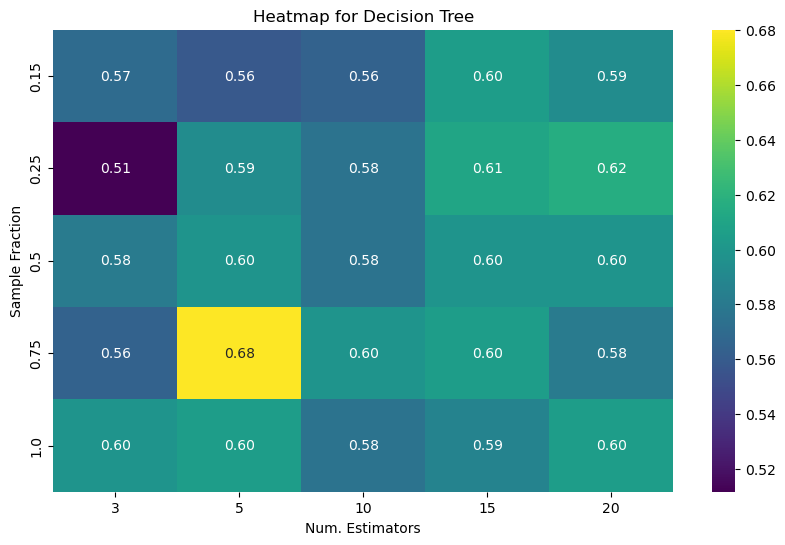



	 For Logistric Regression:


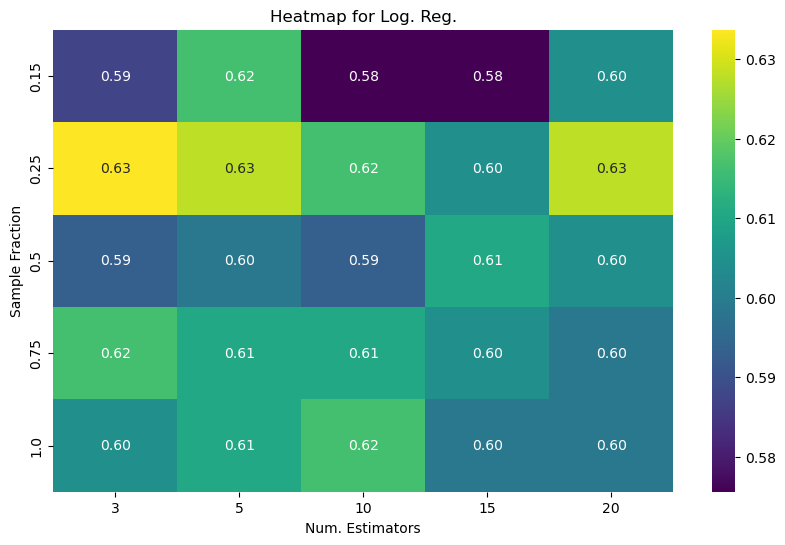



	 For MLP:


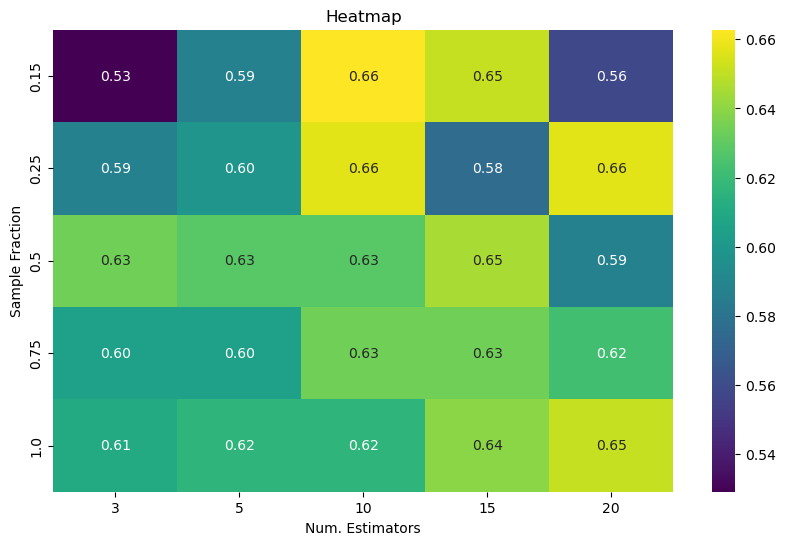

In [31]:
df = pd.DataFrame(sorted_results)

print("Values taken constant:")
print("\t Voting Mechanism = soft")
print("\t Bootstrap = True")

sampled_df = df.loc[df['Voting Mechanism'] == 'soft'].reset_index(drop=True)
sampled_df = sampled_df.loc[sampled_df['Bootstrap'] == True].reset_index(drop=True)


print("\n\n\t For Decision Tree:")

sampled_df_mlp = sampled_df.loc[sampled_df['Model'] == 'dt'].reset_index(drop=True)

heatmap_data = sampled_df_mlp.pivot(
    index="Sample Fraction",
    columns="Num. Estimators",
    values="Accuracy",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap for Decision Tree")
plt.show()

print("\n\n\t For Logistric Regression:")

sampled_df_mlp = sampled_df.loc[sampled_df['Model'] == 'lr'].reset_index(drop=True)

heatmap_data = sampled_df_mlp.pivot(
    index="Sample Fraction",
    columns="Num. Estimators",
    values="Accuracy",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap for Log. Reg.")
plt.show()


print("\n\n\t For MLP:")

sampled_df_mlp = sampled_df.loc[sampled_df['Model'] == 'mlp'].reset_index(drop=True)

heatmap_data = sampled_df_mlp.pivot(
    index="Sample Fraction",
    columns="Num. Estimators",
    values="Accuracy",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap")
plt.show()

#### Compare the performance of each model in List 1 models...

In [43]:
# histograms

base_model_accs = []

# base model accuracy for dt
opt_DT_classifier = DecisionTreeClassifier(random_state=42,
                    criterion='gini',
                    max_depth=5,
                    min_samples_split=5,
                    min_samples_leaf=2
                    )

opt_DT_classifier.fit(wine_X_train, wine_y_train)

wine_y_pred = opt_DT_classifier.predict(wine_X_test)

base_model_accs.append(accuracy_score(wine_y_test, wine_y_pred))

# base model accuracy for LR
opt_log_reg = LogisticRegression(wine_X_train, wine_y_train, num_epochs = 5000, lr = 0.05)
opt_log_reg.fit(print_discreteness=10, validation_features=wine_X_val, 
          validation_labels=wine_y_val, print_validation_metrics = False, 
          wandb_en = False)
y_pred = opt_log_reg.predict(wine_X_test)
base_model_accs.append(accuracy_score(y_pred, wine_y_test))

# base model accuracy for mlp
opt_MLP_classifier = MLPClassifier(wine_X_train, wine_y_train, num_epochs=2500, lr = 0.005,
                        hidden_layers = [64, 256, 80], activation = 'sigmoid', 
                        optimization_technique = 'batch_grad_des')
ret = opt_MLP_classifier.fit(
                    validation_features=wine_X_val, 
                    validation_labels=wine_y_val,
                    return_validation_metrics = True
                  )

y_pred = opt_MLP_classifier.predict(wine_X_test)
base_model_accs.append(accuracy_score(y_pred, wine_y_test))

base_model_accs

[0.5813953488372093, 0.6046511627906976, 0.5523255813953488]

In [48]:
bagging_model_accuracies = []

df_dt = df.loc[df['Model'] == 'dt'].reset_index(drop=True)
bagging_model_accuracies.append(df_dt.iloc[0].to_dict()['Accuracy'])

df_lr = df.loc[df['Model'] == 'lr'].reset_index(drop=True)
bagging_model_accuracies.append(df_lr.iloc[0].to_dict()['Accuracy'])

df_mlp = df.loc[df['Model'] == 'mlp'].reset_index(drop=True)
bagging_model_accuracies.append(df_mlp.iloc[0].to_dict()['Accuracy'])

bagging_model_accuracies

[0.6802325581395349, 0.6337209302325582, 0.6686046511627907]

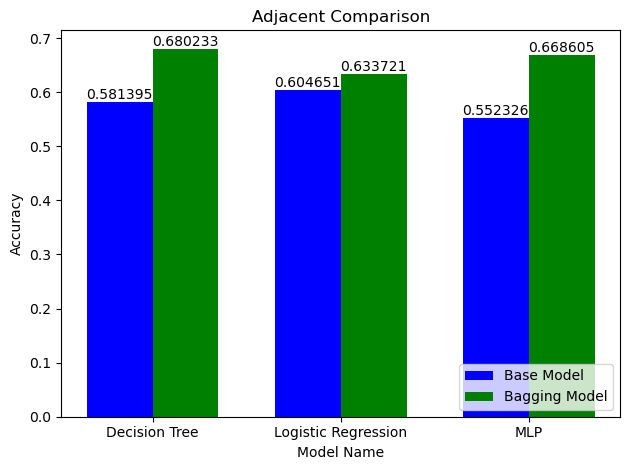

In [57]:
'''
Asked Bard (GPT was down :( 
give me code to draw two barcharts in a single matplotlib chart such that bars of the two charts are adjacent while there is a gap between bars of the same chart
'''

fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(base_model_accs))


bars1 = ax.bar(x - width/2, base_model_accs, width, label='Base Model', color='b')
bars2 = ax.bar(x + width/2, bagging_model_accuracies, width, label='Bagging Model', color='g')

ax.set_xlabel('Model Name')
ax.set_ylabel('Accuracy')
ax.set_title('Adjacent Comparison')

ax.legend(loc='lower right')

ax.set_xticks(x)
ax.set_xticklabels(['Decision Tree', 'Logistic Regression', 'MLP'])
ax.bar_label(bars1)
ax.bar_label(bars2)

plt.tight_layout()

# Show the plot
plt.show()

### Bagging Regressor

In [33]:
class BaggingRegressor():
    """
    A Bagging Regressor that fits a number of base classifiers on random subsets of the data and then aggregates their predictions using either majority voting or probability averaging.

    Parameters:
    -----------
    base_model_name: str
        The name of the base model to use. Valid values are 'dt' for decision tree, 'lr' for logistic regression, and 'mlp' for multilayer perceptron.
    num_estimators: int
        The number of base classifiers to fit.
    sample_fraction: float
        The fraction of the data to sample for each base classifier.
    bootstrap_en: bool
        Whether to use bootstrap sampling or not.
    voting_mech: str
        The voting mechanism to use for aggregating the predictions of the base classifiers. Valid values are 'hard' for majority voting and 'soft' for probability averaging.
    X_val
        The validation set features used for probability averaging
    y_val
        The validation set outputs used for probability averaging

    Attributes:
    -----------
    estimators: list
        A list of the fitted base classifiers.  
    """
    
    
    def __init__(self, base_model_name: str, num_estimators: int, sample_fraction: float, 
                 bootstrap_en: bool, voting_mech: str,
                 X_val: np.ndarray, y_val: np.ndarray)-> None: 
        self.base_model_name = base_model_name
        self.num_estimators = num_estimators
        self.sample_fraction = sample_fraction
        self.bootstrap_en = bootstrap_en
        self.voting_mech = voting_mech
        self.X_val = X_val
        self.y_val = y_val
    
    def fit(self, X, y):
        """
            Fits the Bagging classifier to the training data.
        """
        self.estimators = []
        
        for estimator_index in range(self.num_estimators):
            num_samples = X.shape[0]
            
            if self.bootstrap_en:
                random_inds = [random.randint(0, num_samples - 1) for _ in 
                                   range(round(self.sample_fraction * num_samples))]
                
            else:
                random_inds = random.sample(range(num_samples), round(self.sample_fraction * num_samples))
                
            X_random, y_random = X[random_inds], y[random_inds]
                        
            estimator = None
            
            if self.base_model_name == 'dt':
                estimator = DecisionTreeRegressor(random_state=42,
                                    max_depth=20,
                                    min_samples_split=2,
                                    min_samples_leaf=1
                                    )
                estimator.fit(X_random, y_random)

            elif self.base_model_name == 'lr':
                estimator = LinearRegressor(learning_rate=0.01, n_iterations=5000)
                estimator.fit(X_random, y_random)
                
            elif self.base_model_name == 'mlp':
                estimator = MLPRegressor(X_random, y_random, num_epochs=1000, lr = 0.001,
                                        hidden_layers = [24, 18], activation = 'tanh', 
                                        optimization_technique = 'mini_grad_des')
                estimator.fit(
                                    validation_features=None, 
                                    validation_labels=None,
                                    return_validation_metrics=False
                                  )
                
            else:
                raise TypeError("Not a valid model")
            
            self.estimators.append(estimator)
        
        
    def predict(self, X):
        """
            Predicts the class labels for the given data.
        """
        
        if self.voting_mech == 'hard':
            # asked chatGPT for code to return same preference            
            predictions = [estimator.predict(X) for estimator in self.estimators]
            return np.round(np.mean(predictions, axis=0))
        
        elif self.voting_mech == 'soft':
            predictions = [estimator.predict(X) for estimator in self.estimators]
            
            probs = []
            for est in self.estimators:
                val_set_pred = est.predict(self.X_val)
                
                mse = mean_squared_error(val_set_pred, self.y_val)
                
                probs.append(1/(mse+0.0001)) # Weighting by 1/mse
                
            return np.average(predictions, axis=0, weights=probs)
        
        else:
            raise TypeError("Not a valid voting mechanism")
        

In [34]:
my_bag_regressor = BaggingRegressor(
    base_model_name = 'dt', 
    num_estimators = 5, 
    sample_fraction = 0.7, 
    bootstrap_en = True, 
    voting_mech = 'hard',
    X_val = hous_X_val,
    y_val = hous_y_val
)

my_bag_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_bag_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.39


In [35]:
my_bag_regressor = BaggingRegressor(
    base_model_name = 'dt', 
    num_estimators = 5, 
    sample_fraction = 0.7, 
    bootstrap_en = True, 
    voting_mech = 'soft',
    X_val = hous_X_val,
    y_val = hous_y_val
)

my_bag_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_bag_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.41


In [36]:
my_bag_regressor = BaggingRegressor(
    base_model_name = 'lr', 
    num_estimators = 5, 
    sample_fraction = 0.7, 
    bootstrap_en = True, 
    voting_mech = 'hard',
    X_val = hous_X_val,
    y_val = hous_y_val
)

my_bag_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_bag_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.48


In [37]:
my_bag_regressor = BaggingRegressor(
    base_model_name = 'lr', 
    num_estimators = 5, 
    sample_fraction = 0.7, 
    bootstrap_en = True, 
    voting_mech = 'soft',
    X_val = hous_X_val,
    y_val = hous_y_val
)

my_bag_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_bag_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.39


In [38]:
my_bag_regressor = BaggingRegressor(
    base_model_name = 'mlp', 
    num_estimators = 5, 
    sample_fraction = 0.7, 
    bootstrap_en = True, 
    voting_mech = 'hard',
    X_val = hous_X_val,
    y_val = hous_y_val
)

my_bag_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_bag_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.62


In [39]:
my_bag_regressor = BaggingRegressor(
    base_model_name = 'mlp', 
    num_estimators = 5, 
    sample_fraction = 0.7, 
    bootstrap_en = True, 
    voting_mech = 'soft',
    X_val = hous_X_val,
    y_val = hous_y_val
)

my_bag_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_bag_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.68


In [40]:
models = [
    'dt',
    'lr',
    'mlp'
]

number_of_estimators = [
    3, 5, 10, 15, 20
]

sampling_fractions = [
    0.15,
    0.25,
    0.5,
    0.75,
    1.0
]

voting_mechanisms = [
    'hard',
    'soft'
]

bootstrap_vals = [
    True,
    False
]

In [41]:
reg_table_values = []

for model in models:
    for num_est in number_of_estimators:
        for samp_frac in sampling_fractions:
            for vote_mech in voting_mechanisms:
                for bootstrap_en in bootstrap_vals:
                    
                    print(model, num_est, samp_frac, vote_mech, bootstrap_en)
                    
                    my_bag_regressor = BaggingRegressor(
                        base_model_name = model, 
                        num_estimators = num_est, 
                        sample_fraction = samp_frac, 
                        bootstrap_en = bootstrap_en, 
                        voting_mech = vote_mech,
                        X_val = hous_X_val,
                        y_val = hous_y_val
                    )

                    my_bag_regressor.fit(hous_X_train, hous_y_train)

                    y_pred = my_bag_regressor.predict(hous_X_test)

                    mse = mean_squared_error(y_pred, hous_y_test)
                    
                    
                    reg_table_values.append({
                        "Model": model,
                        "Num. Estimators": num_est,
                        "Sample Fraction": samp_frac,
                        "Voting Mechanism": vote_mech,
                        "Bootstrap": bootstrap_en,
                        "MSE": mse
                    })

dt 3 0.15 hard True
dt 3 0.15 hard False
dt 3 0.15 soft True
dt 3 0.15 soft False
dt 3 0.25 hard True
dt 3 0.25 hard False
dt 3 0.25 soft True
dt 3 0.25 soft False
dt 3 0.5 hard True
dt 3 0.5 hard False
dt 3 0.5 soft True
dt 3 0.5 soft False
dt 3 0.75 hard True
dt 3 0.75 hard False
dt 3 0.75 soft True
dt 3 0.75 soft False
dt 3 1.0 hard True
dt 3 1.0 hard False
dt 3 1.0 soft True
dt 3 1.0 soft False
dt 5 0.15 hard True
dt 5 0.15 hard False
dt 5 0.15 soft True
dt 5 0.15 soft False
dt 5 0.25 hard True
dt 5 0.25 hard False
dt 5 0.25 soft True
dt 5 0.25 soft False
dt 5 0.5 hard True
dt 5 0.5 hard False
dt 5 0.5 soft True
dt 5 0.5 soft False
dt 5 0.75 hard True
dt 5 0.75 hard False
dt 5 0.75 soft True
dt 5 0.75 soft False
dt 5 1.0 hard True
dt 5 1.0 hard False
dt 5 1.0 soft True
dt 5 1.0 soft False
dt 10 0.15 hard True
dt 10 0.15 hard False
dt 10 0.15 soft True
dt 10 0.15 soft False
dt 10 0.25 hard True
dt 10 0.25 hard False
dt 10 0.25 soft True
dt 10 0.25 soft False
dt 10 0.5 hard True
dt 1

In [58]:
table_values = reg_table_values

In [61]:
sorted_results = sorted(table_values, key=lambda x: x["MSE"], reverse=False)

In [62]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+-------+-----------------+-----------------+------------------+-----------+---------------------+
| Model | Num. Estimators | Sample Fraction | Voting Mechanism | Bootstrap |         MSE         |
+-------+-----------------+-----------------+------------------+-----------+---------------------+
|  dt   |       20        |       1.0       |       soft       |   True    | 0.3074878152536319  |
|  dt   |       10        |       1.0       |       soft       |   True    | 0.30942906272591825 |
|  dt   |       10        |      0.75       |       soft       |   True    | 0.31297208545828925 |
|  dt   |       10        |       0.5       |       soft       |   True    | 0.3145942647553871  |
|  dt   |       20        |       0.5       |       soft       |   False   | 0.31803961050062857 |
|  dt   |       10        |      0.75       |       soft       |   False   | 0.3191993662920685  |
|  dt   |        3        |      0.75       |       soft       |   False   | 0.3222186782048181  |
|  dt   | 

Values taken constant:
	 Voting Mechanism = soft
	 Bootstrap = True


	 For Decision Tree:


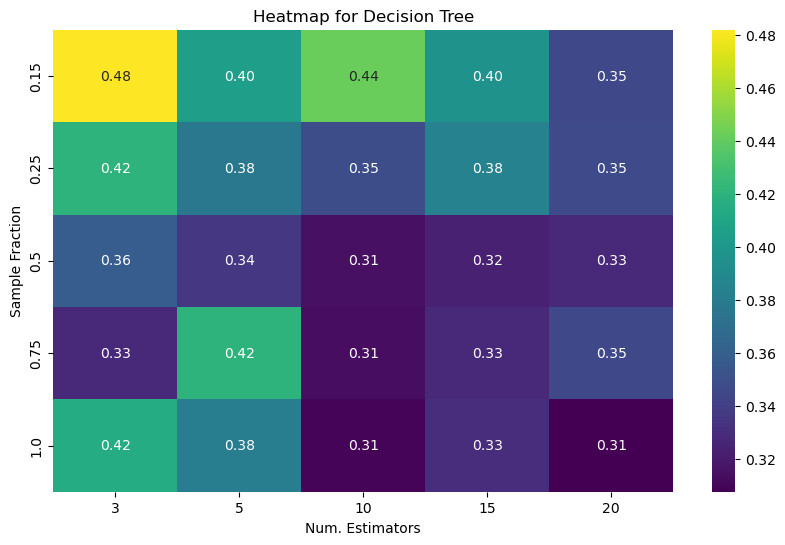



	 For Logistric Regression:


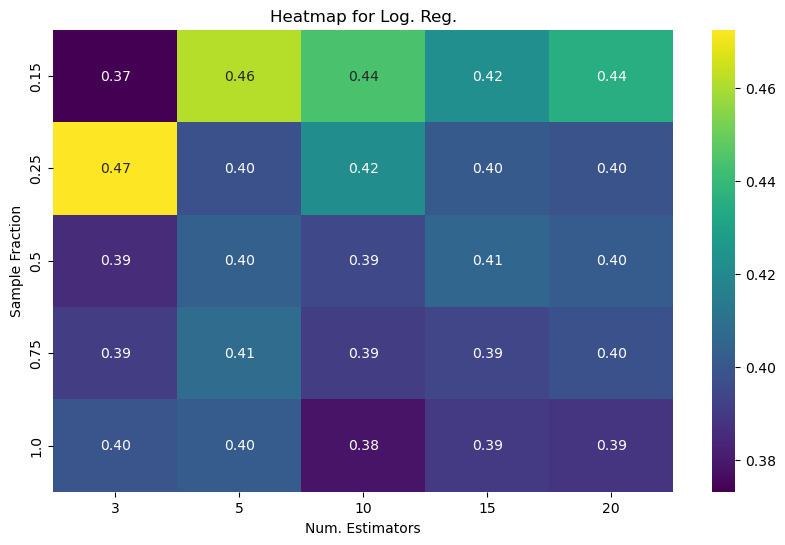



	 For MLP:


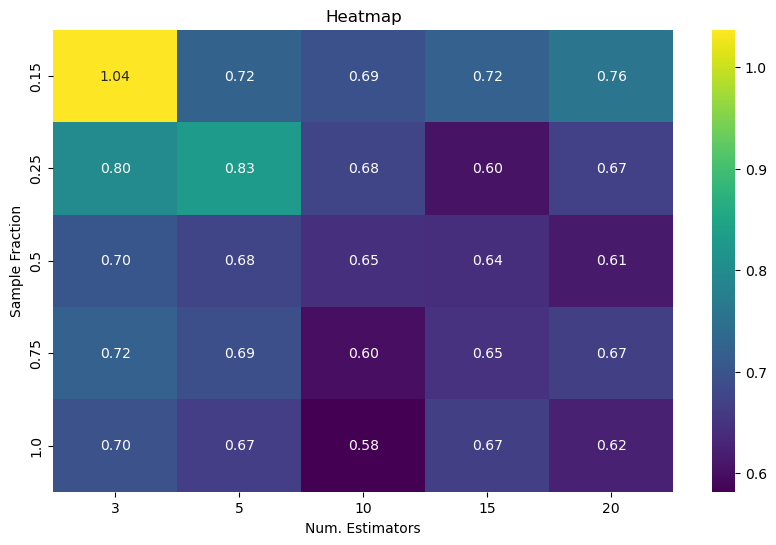

In [63]:
df = pd.DataFrame(sorted_results)

print("Values taken constant:")
print("\t Voting Mechanism = soft")
print("\t Bootstrap = True")

sampled_df = df.loc[df['Voting Mechanism'] == 'soft'].reset_index(drop=True)
sampled_df = sampled_df.loc[sampled_df['Bootstrap'] == True].reset_index(drop=True)


print("\n\n\t For Decision Tree:")

sampled_df_mlp = sampled_df.loc[sampled_df['Model'] == 'dt'].reset_index(drop=True)

heatmap_data = sampled_df_mlp.pivot(
    index="Sample Fraction",
    columns="Num. Estimators",
    values="MSE",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap for Decision Tree")
plt.show()

print("\n\n\t For Logistric Regression:")

sampled_df_mlp = sampled_df.loc[sampled_df['Model'] == 'lr'].reset_index(drop=True)

heatmap_data = sampled_df_mlp.pivot(
    index="Sample Fraction",
    columns="Num. Estimators",
    values="MSE",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap for Log. Reg.")
plt.show()


print("\n\n\t For MLP:")

sampled_df_mlp = sampled_df.loc[sampled_df['Model'] == 'mlp'].reset_index(drop=True)

heatmap_data = sampled_df_mlp.pivot(
    index="Sample Fraction",
    columns="Num. Estimators",
    values="MSE",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap")
plt.show()

In [64]:
# histograms

base_model_mses = []

# base model accuracy for dt
opt_DT_regressor = DecisionTreeRegressor(random_state=42, # after tuning over multiple conditions
                    max_depth=20,
                    min_samples_split=2,
                    min_samples_leaf=1
                    )

opt_DT_regressor.fit(hous_X_train, hous_y_train)

hous_y_pred = opt_DT_regressor.predict(hous_X_test)

base_model_mses.append(mean_squared_error(hous_y_test, hous_y_pred))

# base model accuracy for LR
opt_lin_reg = LinearRegressor(learning_rate=0.01, n_iterations=5000)
opt_lin_reg.fit(hous_X_train, hous_y_train)

hous_y_pred = opt_lin_reg.predict(hous_X_test)

base_model_mses.append(mean_squared_error(hous_y_test, hous_y_pred))

# base model accuracy for mlp
opt_MLP_regressor = MLPRegressor(hous_X_train, hous_y_train, num_epochs=1000, lr = 0.001,
                        hidden_layers = [24, 18], activation = 'tanh', 
                        optimization_technique = 'mini_grad_des')
opt_MLP_regressor.fit(
                    validation_features=None, 
                    validation_labels=None,
                    return_validation_metrics=False
                  )

hous_y_pred = opt_MLP_regressor.predict(hous_X_test)

base_model_mses.append(mean_squared_error(hous_y_test, hous_y_pred))

base_model_mses

[0.34476607295513906, 0.3908601761782921, 0.6125546308399912]

In [65]:
bagging_model_mses = []

df_dt = df.loc[df['Model'] == 'dt'].reset_index(drop=True)
bagging_model_mses.append(df_dt.iloc[0].to_dict()['MSE'])

df_lr = df.loc[df['Model'] == 'lr'].reset_index(drop=True)
bagging_model_mses.append(df_lr.iloc[0].to_dict()['MSE'])

df_mlp = df.loc[df['Model'] == 'mlp'].reset_index(drop=True)
bagging_model_mses.append(df_mlp.iloc[0].to_dict()['MSE'])

bagging_model_mses

[0.3074878152536319, 0.359919496990444, 0.544694072299045]

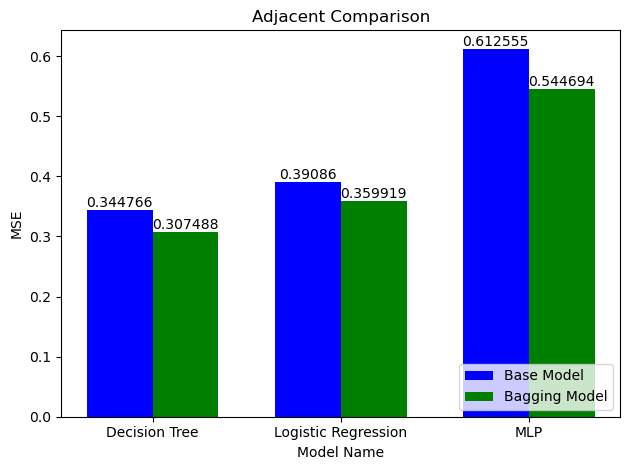

In [66]:
fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(base_model_accs))


bars1 = ax.bar(x - width/2, base_model_mses, width, label='Base Model', color='b')
bars2 = ax.bar(x + width/2, bagging_model_mses, width, label='Bagging Model', color='g')

ax.set_xlabel('Model Name')
ax.set_ylabel('MSE')
ax.set_title('Adjacent Comparison')

ax.legend(loc='lower right')

ax.set_xticks(x)
ax.set_xticklabels(['Decision Tree', 'Logistic Regression', 'MLP'])
ax.bar_label(bars1)
ax.bar_label(bars2)

plt.tight_layout()

# Show the plot
plt.show()

---

## 3.3 Stacking

In [70]:
# Just making train and test splits

wine_X_train, wine_X_temp, wine_y_train, wine_y_temp = train_test_split(wine_X, wine_y, 
                                                                        test_size = 0.3, 
                                                                        random_state= 42)

len(wine_X_train), len(wine_X_test)

(800, 172)

In [71]:
hous_X_train, hous_X_temp, hous_y_train, hous_y_temp = train_test_split(hous_X, hous_y, 
                                                                        test_size = 0.2, 
                                                                        random_state= 42)

len(hous_X_train), len(hous_X_test)

(315, 79)

### Stacking Classifier

In [73]:
from sklearn.model_selection import StratifiedKFold
# using stratified so that each split contains all representatives of the labels

In [180]:
l0_models = [
    ['dt'],
    ['lr'],
    ['mlp'],
    ['dt', 'lr'],
    ['dt', 'mlp'],
    ['lr', 'mlp'],
    ['lr', 'dt', 'mlp']
]

l1_models = ['dt', 'lr']

stacking_methodology = [
    'stacking',
    'blending'
]

number_of_folds = [
    2, 3, 5, 10
]

holdout_percs = [
    0.15, 0.25
]

In [322]:
stacking_classifier_cache = {
    'mlp': {},
    'lr': {}
}

for i in number_of_folds:
    stacking_classifier_cache['lr'][i] = {}
    stacking_classifier_cache['mlp'][i] = {}
    
    for j in range(i):
        stacking_classifier_cache['lr'][i][j] = None
        stacking_classifier_cache['mlp'][i][j] = None
        
stacking_classifier_cache

{'mlp': {2: {0: None, 1: None},
  3: {0: None, 1: None, 2: None},
  5: {0: None, 1: None, 2: None, 3: None, 4: None},
  10: {0: None,
   1: None,
   2: None,
   3: None,
   4: None,
   5: None,
   6: None,
   7: None,
   8: None,
   9: None}},
 'lr': {2: {0: None, 1: None},
  3: {0: None, 1: None, 2: None},
  5: {0: None, 1: None, 2: None, 3: None, 4: None},
  10: {0: None,
   1: None,
   2: None,
   3: None,
   4: None,
   5: None,
   6: None,
   7: None,
   8: None,
   9: None}}}

In [323]:
blending_classifier_cache = {
    'mlp': {},
    'lr': {}
}

for i in holdout_percs:
    blending_classifier_cache['lr'][i] = None
    blending_classifier_cache['mlp'][i] = None
        
blending_classifier_cache

{'mlp': {0.15: None, 0.25: None}, 'lr': {0.15: None, 0.25: None}}

### Design a function that performs the bagging methodology...

In [183]:
class StackingClassifier:
    def __init__(self, l0_models: list, l1_model: str, stacking_methodology: str, num_folds = None, holdout_perc = None):
        """
        Initialize a Stacking Classifier.

        Parameters:
        - l0_models: list of str, List of base model names for level 0 stacking.
                     Valid values are 'dt' for decision tree, 'lr' for logistic regression, and 'mlp' for multilayer perceptron.
        - l1_model: str, The name of the level 1 model. Valid values are 'dt' for decision tree and 'lr' for logistic regression.
        - stacking_methodology: str, The stacking methodology to use. Valid values are 'stacking' and 'blending'.
        - num_folds: int, Number of folds to use in stacking methodology (required for 'stacking').
        - holdout_perc: float, Percentage of data to hold out for blending (required for 'blending').
        """
        
        self.l0_models = l0_models
        self.l1_model = l1_model
        self.stacking_methodology = stacking_methodology
        self.num_folds = num_folds
        self.holdout_perc = holdout_perc
        
    def fit(self, X, y):
        """
        Fit the Stacking Classifier to the training data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.
        - y: array-like, shape (n_samples,), The target values.
        """
        if self.stacking_methodology == 'stacking':
            self._fit_stacking(X, y)
            
        elif self.stacking_methodology == 'blending':
            self._fit_blending(X, y)
        
        else:
            raise ValueError("Not a valid fitting method")
            
    def predict(self, X):
        """
        Predict the class labels for the given data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.

        Returns:
        - y_pred: array, shape (n_samples,), The predicted class labels.
        """
        test_data_new_features_list = []
        
        for est in self.l0_estimators:
            test_data_new_features_list.append(est.predict_proba(X))
            
        test_data_new_features = np.hstack(test_data_new_features_list)
        
        return self.l1_estimator.predict(test_data_new_features)
    
    def _fit_blending(self, X, y):
        """
        Fit the Stacking Classifier using blending methodology.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.
        - y: array-like, shape (n_samples,), The target values.
        """
        X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, 
                                                                    test_size = self.holdout_perc, 
                                                                    random_state= 42)
        
        self.l0_estimators = []
        train_data_new_features_list = []
        
        for model in self.l0_models:
            if model == 'dt':
                estimator = DecisionTreeClassifier(random_state=42,
                                    criterion='gini',
                                    max_depth=5,
                                    min_samples_split=5,
                                    min_samples_leaf=2
                                    )
                estimator.fit(X_train, y_train)

            elif model == 'lr':

                if blending_classifier_cache['lr'][self.holdout_perc] is None:

                    estimator = LogisticRegression(X_train, y_train, num_epochs = 5000, lr = 0.05)
                    estimator.fit(print_discreteness=1000000, validation_features=None, 
                              validation_labels=None, print_validation_metrics = False, 
                              wandb_en = False)

                    blending_classifier_cache['lr'][self.holdout_perc] = estimator
                else:
                    estimator = blending_classifier_cache['lr'][self.holdout_perc]

            elif model == 'mlp':
                if blending_classifier_cache['mlp'][self.holdout_perc] is None:
                    estimator = MLPClassifier(X_train, y_train, num_epochs=2500, lr = 0.005,
                                            hidden_layers = [64, 256, 80], activation = 'sigmoid', 
                                            optimization_technique = 'batch_grad_des')
                    estimator.fit(validation_features=None, 
                                validation_labels=None,
                                return_validation_metrics = False)

                    blending_classifier_cache['mlp'][self.holdout_perc] = estimator
                else:
                    estimator = blending_classifier_cache['mlp'][self.holdout_perc]

            else:
                raise TypeError("Not a valid model")
                
            
            self.l0_estimators.append(estimator)
            
            train_data_new_features_list.append(estimator.predict_proba(X_holdout))
            
        train_data_new_features = np.hstack(train_data_new_features_list)
        
        if self.l1_model == 'dt':
            self.l1_estimator = DecisionTreeClassifier(random_state=42,
                                criterion='gini',
                                max_depth=5,
                                min_samples_split=5,
                                min_samples_leaf=2
                                )
            self.l1_estimator.fit(train_data_new_features, y_holdout)

        elif self.l1_model == 'lr':
            self.l1_estimator = LogisticRegression(train_data_new_features, y_holdout, num_epochs = 5000, lr = 0.05)
            self.l1_estimator.fit(print_discreteness=1000000, validation_features=None, 
                      validation_labels=None, print_validation_metrics = False, 
                      wandb_en = False)
                
        else:
            raise TypeError("Not a valid model")
        
    def _fit_stacking(self, X, y):
        """
        Fit the Stacking Classifier using stacking methodology.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.
        - y: array-like, shape (n_samples,), The target values.
        """
        # resource used - https://medium.com/@stevenyu530_73989/stacking-and-blending-intuitive-explanation-of-advanced-ensemble-methods-46b295da413c
        
        folds = StratifiedKFold(n_splits=self.num_folds)
        
        train_data_new_features_list = []
        
        for i, (train_indices, val_indices) in enumerate(folds.split(X, y)):
            X_train, X_val = X[train_indices], X[val_indices]
            y_train, y_val = y[train_indices], y[val_indices]
        
            cur_fold_preds = []
            
            for model in self.l0_models:

                if model == 'dt':
                    estimator = DecisionTreeClassifier(random_state=42,
                                        criterion='gini',
                                        max_depth=5,
                                        min_samples_split=5,
                                        min_samples_leaf=2
                                        )
                    estimator.fit(X_train, y_train)

                elif model == 'lr':
                    
                    if stacking_classifier_cache['lr'][self.num_folds][i] is None:
                    
                        estimator = LogisticRegression(X_train, y_train, num_epochs = 5000, lr = 0.05)
                        estimator.fit(print_discreteness=1000000, validation_features=None, 
                                  validation_labels=None, print_validation_metrics = False, 
                                  wandb_en = False)
                        
                        stacking_classifier_cache['lr'][self.num_folds][i] = estimator
                    else:
                        estimator = stacking_classifier_cache['lr'][self.num_folds][i]

                elif model == 'mlp':
                    if stacking_classifier_cache['mlp'][self.num_folds][i] is None:
                        estimator = MLPClassifier(X_train, y_train, num_epochs=2500, lr = 0.005,
                                                hidden_layers = [64, 256, 80], activation = 'sigmoid', 
                                                optimization_technique = 'batch_grad_des')
                        estimator.fit(validation_features=None, 
                                    validation_labels=None,
                                    return_validation_metrics = False)
                        
                        stacking_classifier_cache['mlp'][self.num_folds][i] = estimator
                    else:
                        estimator = stacking_classifier_cache['mlp'][self.num_folds][i]
        
                else:
                    raise TypeError("Not a valid model")
                    
                validation_pred = estimator.predict_proba(X_val)
                
                cur_fold_preds.append(np.array(validation_pred))
                                
            cur_folds_pred_concatenated = np.hstack(cur_fold_preds)
            
            train_data_new_features_list.append(cur_folds_pred_concatenated)
            
        train_data_new_features = np.vstack(train_data_new_features_list)
        
        # now we have the train_data_length * num_classes * num_l1_models train dataset
        # we train l1 model over this
            
        if self.l1_model == 'dt':
            self.l1_estimator = DecisionTreeClassifier(random_state=42,
                                criterion='gini',
                                max_depth=5,
                                min_samples_split=5,
                                min_samples_leaf=2
                                )
            self.l1_estimator.fit(train_data_new_features, y)

        elif self.l1_model == 'lr':
            self.l1_estimator = LogisticRegression(train_data_new_features, y, num_epochs = 5000, lr = 0.05)
            self.l1_estimator.fit(print_discreteness=1000000, validation_features=None, 
                      validation_labels=None, print_validation_metrics = False, 
                      wandb_en = False)
                
        else:
            raise TypeError("Not a valid model")
            
            
        # We also train all the l0 models again for the predicting the features of the test data in
        # the required format for the predict step
        
        self.l0_estimators = []
        for model in self.l0_models:
            
            if model == 'dt':
                estimator = DecisionTreeClassifier(random_state=42,
                                    criterion='gini',
                                    max_depth=5,
                                    min_samples_split=5,
                                    min_samples_leaf=2
                                    )
                estimator.fit(X, y)

            elif model == 'lr':
                estimator = LogisticRegression(X, y, num_epochs = 5000, lr = 0.05)
                estimator.fit(print_discreteness=1000000, validation_features=None, 
                          validation_labels=None, print_validation_metrics = False, 
                          wandb_en = False)

            elif model == 'mlp':
                estimator = MLPClassifier(X, y, num_epochs=2500, lr = 0.005,
                                        hidden_layers = [64, 256, 80], activation = 'sigmoid', 
                                        optimization_technique = 'batch_grad_des')
                estimator.fit(validation_features=None, 
                            validation_labels=None,
                            return_validation_metrics = False)

            else:
                raise TypeError("Not a valid model")
                
            self.l0_estimators.append(estimator)
            


In [149]:
my_stack_classifier = StackingClassifier(l0_models=['lr'], l1_model='dt', 
                                         stacking_methodology='stacking', num_folds=5)
my_stack_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_stack_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.49


In [150]:
my_stack_classifier = StackingClassifier(l0_models=['dt', 'lr'], l1_model='dt', 
                                         stacking_methodology='stacking', num_folds=5)
my_stack_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_stack_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.47


In [153]:
my_stack_classifier = StackingClassifier(l0_models=['dt', 'lr', 'mlp'], l1_model='dt', 
                                         stacking_methodology='stacking', num_folds=5)
my_stack_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_stack_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.48


In [175]:
my_stack_classifier = StackingClassifier(l0_models=['lr', 'dt'], l1_model='dt', 
                                         stacking_methodology='blending', holdout_perc = 0.25)
my_stack_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_stack_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.51


In [178]:
my_stack_classifier = StackingClassifier(l0_models=['lr', 'mlp'], l1_model='dt', 
                                         stacking_methodology='blending', holdout_perc = 0.25)
my_stack_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_stack_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


In [190]:
l0_model_list = [
    ['dt'],
    ['lr'],
    ['mlp'],
    ['dt', 'lr'],
    ['dt', 'mlp'],
    ['lr', 'mlp'],
    ['lr', 'dt', 'mlp']
]

l1_models = ['dt', 'lr']

stacking_methodology = [
    'stacking',
    'blending'
]

number_of_folds = [
    2, 3, 5, 10
]

holdout_percs = [
    0.15, 0.25
]

table_values = []

for l0_models in l0_model_list:
    for l1_model in l1_models:
        for method in stacking_methodology:
            
            if method == 'stacking':
                holdout_perc = None
                for n_folds in number_of_folds:
                    
                    print(l0_models, l1_model, method, n_folds, holdout_perc)
                    
                    my_stack_classifier = StackingClassifier(l0_models=l0_models, l1_model=l1_model, 
                                                             stacking_methodology=method, num_folds=n_folds)
                    my_stack_classifier.fit(wine_X_train, wine_y_train)

                    y_pred = my_stack_classifier.predict(wine_X_test)

                    accuracy = accuracy_score(y_pred, wine_y_test)
                      
                    table_values.append({
                        "L0 Models": l0_models,
                        "L1 Model": l1_model,
                        "Method": method,
                        "Num. Folds": n_folds,
                        "Holdout Perc.": holdout_perc,
                        "Accuracy": accuracy
                    })
            else:
                n_folds = None
                for holdout_perc in holdout_percs:
                    
                    print(l0_models, l1_model, method, n_folds, holdout_perc)
                    
                    my_stack_classifier = StackingClassifier(l0_models=l0_models, l1_model=l1_model, 
                                                             stacking_methodology=method, holdout_perc=holdout_perc)
                    my_stack_classifier.fit(wine_X_train, wine_y_train)

                    y_pred = my_stack_classifier.predict(wine_X_test)

                    accuracy = accuracy_score(y_pred, wine_y_test)
                    
                    table_values.append({
                        "L0 Models": l0_models,
                        "L1 Model": l1_model,
                        "Method": method,
                        "Num. Folds": n_folds,
                        "Holdout Perc.": holdout_perc,
                        "Accuracy": accuracy
                    })

['dt'] dt stacking 2 None
['dt'] dt stacking 3 None
['dt'] dt stacking 5 None
['dt'] dt stacking 10 None
['dt'] dt blending None 0.15
['dt'] dt blending None 0.25
['dt'] lr stacking 2 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['dt'] lr stacking 3 None
['dt'] lr stacking 5 None
['dt'] lr stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['dt'] lr blending None 0.15
['dt'] lr blending None 0.25
['lr'] dt stacking 2 None
['lr'] dt stacking 3 None
['lr'] dt stacking 5 None
['lr'] dt stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['lr'] dt blending None 0.15
['lr'] dt blending None 0.25
['lr'] lr stacking 2 None
['lr'] lr stacking 3 None
['lr'] lr stacking 5 None
['lr'] lr stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['lr'] lr blending None 0.15
['lr'] lr blending None 0.25
['mlp'] dt stacking 2 None
['mlp'] dt stacking 3 None
['mlp'] dt stacking 5 None
['mlp'] dt stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['mlp'] dt blending None 0.15
['mlp'] dt blending None 0.25
['mlp'] lr stacking 2 None
['mlp'] lr stacking 3 None
['mlp'] lr stacking 5 None
['mlp'] lr stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['mlp'] lr blending None 0.15
['mlp'] lr blending None 0.25
['dt', 'lr'] dt stacking 2 None
['dt', 'lr'] dt stacking 3 None
['dt', 'lr'] dt stacking 5 None
['dt', 'lr'] dt stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['dt', 'lr'] dt blending None 0.15
['dt', 'lr'] dt blending None 0.25
['dt', 'lr'] lr stacking 2 None
['dt', 'lr'] lr stacking 3 None
['dt', 'lr'] lr stacking 5 None
['dt', 'lr'] lr stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['dt', 'lr'] lr blending None 0.15
['dt', 'lr'] lr blending None 0.25
['dt', 'mlp'] dt stacking 2 None
['dt', 'mlp'] dt stacking 3 None
['dt', 'mlp'] dt stacking 5 None
['dt', 'mlp'] dt stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['dt', 'mlp'] dt blending None 0.15
['dt', 'mlp'] dt blending None 0.25
['dt', 'mlp'] lr stacking 2 None
['dt', 'mlp'] lr stacking 3 None
['dt', 'mlp'] lr stacking 5 None
['dt', 'mlp'] lr stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['dt', 'mlp'] lr blending None 0.15
['dt', 'mlp'] lr blending None 0.25
['lr', 'mlp'] dt stacking 2 None
['lr', 'mlp'] dt stacking 3 None
['lr', 'mlp'] dt stacking 5 None
['lr', 'mlp'] dt stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['lr', 'mlp'] dt blending None 0.15
['lr', 'mlp'] dt blending None 0.25
['lr', 'mlp'] lr stacking 2 None
['lr', 'mlp'] lr stacking 3 None
['lr', 'mlp'] lr stacking 5 None
['lr', 'mlp'] lr stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['lr', 'mlp'] lr blending None 0.15
['lr', 'mlp'] lr blending None 0.25
['lr', 'dt', 'mlp'] dt stacking 2 None
['lr', 'dt', 'mlp'] dt stacking 3 None
['lr', 'dt', 'mlp'] dt stacking 5 None
['lr', 'dt', 'mlp'] dt stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['lr', 'dt', 'mlp'] dt blending None 0.15
['lr', 'dt', 'mlp'] dt blending None 0.25
['lr', 'dt', 'mlp'] lr stacking 2 None
['lr', 'dt', 'mlp'] lr stacking 3 None
['lr', 'dt', 'mlp'] lr stacking 5 None
['lr', 'dt', 'mlp'] lr stacking 10 None


/home/vineeth/miniconda3/envs/smai/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


['lr', 'dt', 'mlp'] lr blending None 0.15
['lr', 'dt', 'mlp'] lr blending None 0.25


#### report the best-performing models...

In [191]:
sorted_results = sorted(table_values, key=lambda x: x["Accuracy"], reverse=True)

In [192]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+---------------------+----------+----------+------------+---------------+---------------------+
|      L0 Models      | L1 Model |  Method  | Num. Folds | Holdout Perc. |      Accuracy       |
+---------------------+----------+----------+------------+---------------+---------------------+
|    ['dt', 'mlp']    |    lr    | stacking |     3      |               | 0.6337209302325582  |
|       ['mlp']       |    lr    | blending |            |     0.15      |  0.627906976744186  |
|    ['dt', 'mlp']    |    lr    | stacking |     2      |               |  0.627906976744186  |
|       ['mlp']       |    dt    | stacking |     2      |               |  0.622093023255814  |
|    ['dt', 'mlp']    |    lr    | blending |            |     0.15      | 0.6162790697674418  |
|    ['lr', 'mlp']    |    dt    | stacking |     2      |               | 0.6162790697674418  |
|       ['mlp']       |    lr    | stacking |     2      |               | 0.6104651162790697  |
|    ['lr', 'mlp']    |    lr 

#### Compare the accuracies and the training time...

In [325]:
# Bagging

start_time = time.time()

# dt   |        5        |      0.75       |       soft       |   True    | 0.6802325581395349 

my_bag_classifier = BaggingClassifier(
    base_model_name = 'dt', 
    num_estimators = 5, 
    sample_fraction = 0.75, 
    bootstrap_en = True, 
    voting_mech = 'soft'
)

my_bag_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_bag_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)

end_time = time.time()

elapsed_time = end_time - start_time

print(f'Time Taken: {elapsed_time:.2f}')

Time Taken: 0.02


In [324]:
# Stacking


# cleared cache before doing this
start_time = time.time()

my_stack_classifier = StackingClassifier(l0_models=['dt', 'mlp'], l1_model='lr', 
                                         stacking_methodology='stacking', num_folds=3)
my_stack_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_stack_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)

end_time = time.time()

elapsed_time = end_time - start_time

print(f'Time Taken: {elapsed_time:.2f}')

Time Taken: 46.05


Best Bagging Classifier:

    Time: 0.02s
    Accuracy: 68%
    
Best Stacking Classifier:

    Time: 46.05s
    Accuracy: 63%
    
    
**RESULT**

    Bagging classifier is superior in both time and accuracy

### Stacking Regressor

In [300]:
from sklearn.model_selection import KFold

In [335]:
stacking_regressor_cache = {
    'mlp': {},
    'lr': {}
}

for i in number_of_folds:
    stacking_regressor_cache['lr'][i] = {}
    stacking_regressor_cache['mlp'][i] = {}
    
    for j in range(i):
        stacking_regressor_cache['lr'][i][j] = None
        stacking_regressor_cache['mlp'][i][j] = None
        
stacking_regressor_cache

{'mlp': {2: {0: None, 1: None},
  3: {0: None, 1: None, 2: None},
  5: {0: None, 1: None, 2: None, 3: None, 4: None},
  10: {0: None,
   1: None,
   2: None,
   3: None,
   4: None,
   5: None,
   6: None,
   7: None,
   8: None,
   9: None}},
 'lr': {2: {0: None, 1: None},
  3: {0: None, 1: None, 2: None},
  5: {0: None, 1: None, 2: None, 3: None, 4: None},
  10: {0: None,
   1: None,
   2: None,
   3: None,
   4: None,
   5: None,
   6: None,
   7: None,
   8: None,
   9: None}}}

In [334]:
blending_regressor_cache = {
    'mlp': {},
    'lr': {}
}

for i in holdout_percs:
    blending_regressor_cache['lr'][i] = None
    blending_regressor_cache['mlp'][i] = None
        
blending_regressor_cache

{'mlp': {0.15: None, 0.25: None}, 'lr': {0.15: None, 0.25: None}}

In [303]:
class StackingRegressor:
    def __init__(self, l0_models: list, l1_model: str, stacking_methodology: str, num_folds = None, holdout_perc = None):
        """
        Initialize a Stacking Regressor.

        Parameters:
        - l0_models: list of str, List of base model names for level 0 stacking.
                     Valid values are 'dt' for decision tree, 'lr' for linear regression, and 'mlp' for multilayer perceptron.
        - l1_model: str, The name of the level 1 model. Valid values are 'dt' for decision tree and 'lr' for linear regression.
        - stacking_methodology: str, The stacking methodology to use. Valid values are 'stacking' and 'blending'.
        - num_folds: int, Number of folds to use in stacking methodology (required for 'stacking').
        - holdout_perc: float, Percentage of data to hold out for blending (required for 'blending').
        """

        self.l0_models = l0_models
        self.l1_model = l1_model
        self.stacking_methodology = stacking_methodology
        self.num_folds = num_folds
        self.holdout_perc = holdout_perc
        
    def fit(self, X, y):
        """
        Fit the Stacking Regressor to the training data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.
        - y: array-like, shape (n_samples,), The target values.
        """
        if self.stacking_methodology == 'stacking':
            self._fit_stacking(X, y)
            
        elif self.stacking_methodology == 'blending':
            self._fit_blending(X, y)
        
        else:
            raise ValueError("Not a valid fitting method")
            
    def predict(self, X):
        """
        Predict the target values for the given data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.

        Returns:
        - y_pred: array, shape (n_samples,), The predicted target values.
        """
        test_data_new_features_list = []
        
        for est in self.l0_estimators:
            cur_pred = np.array(est.predict(X))
            
            if cur_pred.ndim == 1:
                cur_pred = cur_pred[:, np.newaxis]
                        
            test_data_new_features_list.append(cur_pred)
            
        test_data_new_features = np.hstack(test_data_new_features_list)
        
        return self.l1_estimator.predict(test_data_new_features)
    
    def _fit_blending(self, X, y):
        """
        Fit the Stacking Regressor using blending methodology.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.
        - y: array-like, shape (n_samples,), The target values.
        """
        X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, 
                                                                    test_size = self.holdout_perc, 
                                                                    random_state= 42)
        
        self.l0_estimators = []
        train_data_new_features_list = []
        
        for model in self.l0_models:
            if model == 'dt':
                estimator = DecisionTreeRegressor(random_state=42, 
                                    max_depth=20,
                                    min_samples_split=2,
                                    min_samples_leaf=1
                                    )
                estimator.fit(X_train, y_train)

            elif model == 'lr':

                if blending_regressor_cache['lr'][self.holdout_perc] is None:
                    
                    estimator = LinearRegressor(learning_rate=0.01, n_iterations=5000)
                    estimator.fit(X_train, y_train)

                    blending_regressor_cache['lr'][self.holdout_perc] = estimator
                else:
                    estimator = blending_regressor_cache['lr'][self.holdout_perc]

            elif model == 'mlp':
                if blending_regressor_cache['mlp'][self.holdout_perc] is None:
                    estimator = MLPRegressor(X_train, y_train, num_epochs=1000, lr = 0.001,
                                            hidden_layers = [24, 18], activation = 'tanh', 
                                            optimization_technique = 'mini_grad_des')
                    estimator.fit(validation_features=None, 
                                validation_labels=None,
                                return_validation_metrics = False)

                    blending_regressor_cache['mlp'][self.holdout_perc] = estimator
                else:
                    estimator = blending_regressor_cache['mlp'][self.holdout_perc]

            else:
                raise TypeError("Not a valid model")
                
            
            self.l0_estimators.append(estimator)
            
            pred = estimator.predict(X_holdout)
            
            if pred.ndim == 1:
                pred = pred[:, np.newaxis]
            
            train_data_new_features_list.append(pred)
            
        train_data_new_features = np.hstack(train_data_new_features_list)
                
        if self.l1_model == 'dt':
            self.l1_estimator = DecisionTreeRegressor(random_state=42, 
                                max_depth=20,
                                min_samples_split=2,
                                min_samples_leaf=1
                                )
            self.l1_estimator.fit(train_data_new_features, y_holdout)

        elif self.l1_model == 'lr':           
            self.l1_estimator = LinearRegressor(learning_rate=0.01, n_iterations=5000)
            self.l1_estimator.fit(train_data_new_features, y_holdout)
                
        else:
            raise TypeError("Not a valid model")
        
    def _fit_stacking(self, X, y):
                
        # resource used - https://medium.com/@stevenyu530_73989/stacking-and-blending-intuitive-explanation-of-advanced-ensemble-methods-46b295da413c
        
        folds = KFold(n_splits=self.num_folds)
        
        train_data_new_features_list = []
        
        for i, (train_indices, val_indices) in enumerate(folds.split(X, y)):
            X_train, X_val = X[train_indices], X[val_indices]
            y_train, y_val = y[train_indices], y[val_indices]
                
            cur_fold_preds = []
            
            for model in self.l0_models:

                if model == 'dt':
                    estimator = DecisionTreeRegressor(random_state=42, 
                                        max_depth=20,
                                        min_samples_split=2,
                                        min_samples_leaf=1
                                        )
                    estimator.fit(X_train, y_train)

                elif model == 'lr':
                    
                    if stacking_regressor_cache['lr'][self.num_folds][i] is None:
                        
                        estimator = LinearRegressor(learning_rate=0.01, n_iterations=5000)
                        estimator.fit(X_train, y_train)
                        
                        stacking_regressor_cache['lr'][self.num_folds][i] = estimator
                    else:
                        estimator = stacking_regressor_cache['lr'][self.num_folds][i]

                elif model == 'mlp':
                    if stacking_regressor_cache['mlp'][self.num_folds][i] is None:
                        estimator = MLPRegressor(X_train, y_train, num_epochs=1000, lr = 0.001,
                                            hidden_layers = [24, 18], activation = 'tanh', 
                                            optimization_technique = 'mini_grad_des')
                        estimator.fit(validation_features=None, 
                                    validation_labels=None,
                                    return_validation_metrics = False)
                        
                        stacking_regressor_cache['mlp'][self.num_folds][i] = estimator
                    else:
                        estimator = stacking_regressor_cache['mlp'][self.num_folds][i]
        
                else:
                    raise TypeError("Not a valid model")
                
                validation_pred = np.array(estimator.predict(X_val))
                
                if validation_pred.ndim == 1:
                    validation_pred = validation_pred[:, np.newaxis]
                                
                cur_fold_preds.append(validation_pred)
                
            cur_folds_pred_concatenated = np.hstack(cur_fold_preds)
                                    
            train_data_new_features_list.append(cur_folds_pred_concatenated)
                        
        train_data_new_features = np.vstack(train_data_new_features_list)
                
        # now we have the train_data_length * num_classes * num_l1_models train dataset
        # we train l1 model over this
            
        if self.l1_model == 'dt':
            self.l1_estimator = DecisionTreeRegressor(random_state=42, 
                                max_depth=20,
                                min_samples_split=2,
                                min_samples_leaf=1
                                )
            self.l1_estimator.fit(train_data_new_features, y)

        elif self.l1_model == 'lr':           
            self.l1_estimator = LinearRegressor(learning_rate=0.01, n_iterations=5000)
            self.l1_estimator.fit(train_data_new_features, y)
                
        else:
            raise TypeError("Not a valid model")
            
            
        # We also train all the l0 models again for the predicting the features of the test data in
        # the required format for the predict step
        
        self.l0_estimators = []
        for model in self.l0_models:
            
            if model == 'dt':
                estimator = DecisionTreeRegressor(random_state=42, 
                                    max_depth=20,
                                    min_samples_split=2,
                                    min_samples_leaf=1
                                    )
                estimator.fit(X, y)

            elif model == 'lr':                
                estimator = LinearRegressor(learning_rate=0.01, n_iterations=5000)
                estimator.fit(X, y)
                

            elif model == 'mlp':
                estimator = MLPRegressor(X, y, num_epochs=1000, lr = 0.001,
                                        hidden_layers = [24, 18], activation = 'tanh', 
                                        optimization_technique = 'mini_grad_des')
                estimator.fit(validation_features=None, 
                            validation_labels=None,
                            return_validation_metrics = False)

            else:
                raise TypeError("Not a valid model")
                
            self.l0_estimators.append(estimator)
            


In [304]:
hous_X_train.shape, hous_X_test.shape

((315, 13), (79, 13))

In [305]:
my_stack_regressor = StackingRegressor(l0_models=['dt', 'lr'], l1_model='lr', 
                                         stacking_methodology='stacking', num_folds=5)
my_stack_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_stack_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.31


In [306]:
my_stack_regressor = StackingRegressor(l0_models=['lr'], l1_model='dt', 
                                         stacking_methodology='stacking', num_folds=3)
my_stack_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_stack_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.44


In [307]:
my_stack_regressor = StackingRegressor(l0_models=['dt', 'lr'], l1_model='dt', 
                                         stacking_methodology='blending', holdout_perc=0.25)
my_stack_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_stack_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.37


In [308]:
my_stack_regressor = StackingRegressor(l0_models=['dt', 'lr', 'mlp'], l1_model='dt', 
                                         stacking_methodology='stacking', num_folds = 3)
my_stack_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_stack_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.53


In [309]:
my_stack_regressor = StackingRegressor(l0_models=['dt', 'lr', 'mlp'], l1_model='dt', 
                                         stacking_methodology='blending', holdout_perc=0.25)
my_stack_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_stack_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.41


In [310]:
l0_model_list = [
    ['dt'],
    ['lr'],
    ['mlp'],
    ['dt', 'lr'],
    ['dt', 'mlp'],
    ['lr', 'mlp'],
    ['lr', 'dt', 'mlp']
]

l1_models = ['dt', 'lr']

stacking_methodology = [
    'stacking',
    'blending'
]

number_of_folds = [
    2, 3, 5, 10
]

holdout_percs = [
    0.15, 0.25
]

table_values = []

for l0_models in l0_model_list:
    for l1_model in l1_models:
        for method in stacking_methodology:
            
            if method == 'stacking':
                holdout_perc = None
                for n_folds in number_of_folds:
                    
                    print(l0_models, l1_model, method, n_folds, holdout_perc)
                    
                    my_stack_regressor = StackingRegressor(l0_models=l0_models, l1_model=l1_model, 
                                                             stacking_methodology=method, num_folds=n_folds)
                    my_stack_regressor.fit(hous_X_train, hous_y_train)

                    y_pred = my_stack_regressor.predict(hous_X_test)

                    mse = mean_squared_error(y_pred, hous_y_test)
                      
                    table_values.append({
                        "L0 Models": l0_models,
                        "L1 Model": l1_model,
                        "Method": method,
                        "Num. Folds": n_folds,
                        "Holdout Perc.": holdout_perc,
                        "MSE": mse
                    })
            else:
                n_folds = None
                for holdout_perc in holdout_percs:
                    
                    print(l0_models, l1_model, method, n_folds, holdout_perc)
                    
                    my_stack_regressor = StackingRegressor(l0_models=l0_models, l1_model=l1_model, 
                                                             stacking_methodology=method, holdout_perc=holdout_perc)
                    my_stack_regressor.fit(hous_X_train, hous_y_train)

                    y_pred = my_stack_regressor.predict(hous_X_test)

                    mse = mean_squared_error(y_pred, hous_y_test)
                    
                    table_values.append({
                        "L0 Models": l0_models,
                        "L1 Model": l1_model,
                        "Method": method,
                        "Num. Folds": n_folds,
                        "Holdout Perc.": holdout_perc,
                        "MSE": mse
                    })

['dt'] dt stacking 2 None
['dt'] dt stacking 3 None
['dt'] dt stacking 5 None
['dt'] dt stacking 10 None
['dt'] dt blending None 0.15
['dt'] dt blending None 0.25
['dt'] lr stacking 2 None
['dt'] lr stacking 3 None
['dt'] lr stacking 5 None
['dt'] lr stacking 10 None
['dt'] lr blending None 0.15
['dt'] lr blending None 0.25
['lr'] dt stacking 2 None
['lr'] dt stacking 3 None
['lr'] dt stacking 5 None
['lr'] dt stacking 10 None
['lr'] dt blending None 0.15
['lr'] dt blending None 0.25
['lr'] lr stacking 2 None
['lr'] lr stacking 3 None
['lr'] lr stacking 5 None
['lr'] lr stacking 10 None
['lr'] lr blending None 0.15
['lr'] lr blending None 0.25
['mlp'] dt stacking 2 None
['mlp'] dt stacking 3 None
['mlp'] dt stacking 5 None
['mlp'] dt stacking 10 None
['mlp'] dt blending None 0.15
['mlp'] dt blending None 0.25
['mlp'] lr stacking 2 None
['mlp'] lr stacking 3 None
['mlp'] lr stacking 5 None
['mlp'] lr stacking 10 None
['mlp'] lr blending None 0.15
['mlp'] lr blending None 0.25
['dt', 'lr

In [314]:
sorted_results = sorted(table_values, key=lambda x: x["MSE"], reverse=False)

In [315]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+---------------------+----------+----------+------------+---------------+---------------------+
|      L0 Models      | L1 Model |  Method  | Num. Folds | Holdout Perc. |         MSE         |
+---------------------+----------+----------+------------+---------------+---------------------+
|    ['dt', 'mlp']    |    lr    | stacking |     2      |               | 0.29909533543683386 |
|    ['dt', 'lr']     |    lr    | stacking |     3      |               | 0.30199872611269996 |
|    ['dt', 'lr']     |    lr    | stacking |     10     |               | 0.3045066055595817  |
|    ['dt', 'lr']     |    lr    | stacking |     5      |               | 0.30776833100214035 |
| ['lr', 'dt', 'mlp'] |    lr    | stacking |     10     |               | 0.3097108016793194  |
| ['lr', 'dt', 'mlp'] |    lr    | stacking |     2      |               |  0.311476616396607  |
|    ['dt', 'lr']     |    lr    | stacking |     2      |               | 0.31432627466182467 |
| ['lr', 'dt', 'mlp'] |    lr 

#### Compare the accuracies and the training time...


In [337]:
# Bagging
# dt   |       20        |       1.0       |       soft       |   True    | 0.3074878152536319  |
 
# cleared cache before doing this
start_time = time.time()

my_bag_regressor = BaggingRegressor(
    base_model_name = 'lr', 
    num_estimators = 20, 
    sample_fraction = 1.0, 
    bootstrap_en = True, 
    voting_mech = 'soft',
    X_val = hous_X_val,
    y_val = hous_y_val
)

my_bag_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_bag_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)

end_time = time.time()

elapsed_time = end_time - start_time

print(f'Time Taken: {elapsed_time:.2f}')

Time Taken: 2.66


In [336]:
# Stacking
# ['dt', 'mlp']    |    lr    | stacking |     2      |               | 0.29909533543683386
 
# cleared cache before doing this
start_time = time.time()

my_stack_regressor = StackingRegressor(l0_models=['dt', 'mlp'], l1_model='lr', 
                                         stacking_methodology='stacking', num_folds=2)
my_stack_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_stack_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)

end_time = time.time()

elapsed_time = end_time - start_time

print(f'Time Taken: {elapsed_time:.2f}')

Time Taken: 0.58


Best Bagging Regressor:

    Time: 2.6s
    MSE: 0.707
    
Best Stacking Regressor:

    Time: 0.58s
    MSE: 0.299
    
    
**RESULT**

    Best stacking regressor is superior in both time and MSE

---

# 4 Random Forest vs Boosted Trees

In [338]:
# diving into train, val and test
wine_X = wine_data.drop('quality', axis = 1)
wine_y = wine_data['quality'].to_numpy()

scaler = StandardScaler()
wine_X = scaler.fit_transform(wine_X)

wine_X_train, wine_X_temp, wine_y_train, wine_y_temp = train_test_split(wine_X, wine_y, 
                                                                        test_size = 0.3, 
                                                                        random_state= 42)

wine_X_val, wine_X_test, wine_y_val, wine_y_test = train_test_split(wine_X_temp, wine_y_temp, 
                                                                        test_size = 0.5, 
                                                                        random_state= 42)

len(wine_X_train), len(wine_X_val), len(wine_X_test)

(800, 171, 172)

In [339]:
# diving into train, val and test

scaler = StandardScaler()
hous_data = scaler.fit_transform(hous_data)

hous_X = hous_data[:, :-1]
hous_y = hous_data[:, -1]


hous_X_train, hous_X_temp, hous_y_train, hous_y_temp = train_test_split(hous_X, hous_y, 
                                                                        test_size = 0.2, 
                                                                        random_state= 42)

hous_X_val, hous_X_test, hous_y_val, hous_y_test = train_test_split(hous_X_temp, hous_y_temp, 
                                                                        test_size = 0.5, 
                                                                        random_state= 42)

len(hous_X_train), len(hous_X_val), len(hous_X_test)

(315, 39, 40)

## 4.1 Train a Random Forest Classifier and Regressor

In [345]:
'''
NOTE: from chatGPT

A Random Forest is an ensemble learning method that operates by constructing a 
multitude of decision trees at training time and outputting the class that is the mode
of the classes (classification) or mean prediction (regression) of the individual trees. 
In simpler terms, it's a way of combining the predictions of multiple decision trees 
to improve the overall accuracy and control overfitting.


This is just bagging but with hard voting
'''
print(None)

None


### Random Forrest Classifier

In [401]:
class RandomForClassifier:
    def __init__(self, num_estimators: int, sample_fraction: float, bootstrap_en: bool, min_samples_split: int, min_samples_leaf: int)-> None: 
        """
        Initialize a Random Forest Classifier.

        Parameters:
        - num_estimators: int, The number of decision tree estimators in the random forest.
        - sample_fraction: float, The fraction of samples to be used for training each decision tree.
        - bootstrap_en: bool, Whether to use bootstrapping for sampling with replacement.
        - min_samples_split: int, The minimum number of samples required to split an internal node in a decision tree.
        - min_samples_leaf: int, The minimum number of samples required to be in a leaf node in a decision tree.
        """
        self.base_model_name = 'dt'
        self.num_estimators = num_estimators
        self.sample_fraction = sample_fraction
        self.bootstrap_en = bootstrap_en
        self.voting_mech = 'hard'
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
    
    def fit(self, X, y):
        """
            Fits the Bagging classifier to the training data.
        """
        self.estimators = []
        self.estimator_classes = []
        
        for estimator_index in range(self.num_estimators):
            num_samples = X.shape[0]
            
            if self.bootstrap_en:
                random_inds = [random.randint(0, num_samples - 1) for _ in 
                                   range(round(self.sample_fraction * num_samples))]
                
            else:
                random_inds = random.sample(range(num_samples), round(self.sample_fraction * num_samples))
                
            X_random, y_random = X[random_inds], y[random_inds]
            
            self.estimator_classes.append(np.unique(y_random))
            
            estimator = None
            
            if self.base_model_name == 'dt':
                estimator = DecisionTreeClassifier(
                                    criterion='gini',
                                    min_samples_split=self.min_samples_split,
                                    min_samples_leaf=self.min_samples_leaf
                                    )
                estimator.fit(X_random, y_random)
                
            else:
                raise TypeError("Not a valid model")
            
            self.estimators.append(estimator)
        
        
    def predict(self, X):
        """
            Predicts the class labels for the given data.
        """
        
        if self.voting_mech == 'hard':
            
            # asked chatGPT for code to return same preference            
            predictions = [estimator.predict(X) for estimator in self.estimators]
            return np.round(np.mean(predictions, axis=0))
        
        elif self.voting_mech == 'soft':
            probabilities = [estimator.predict_proba(X) for estimator in self.estimators]
            padded_probabilities = []
            
            for i, est_probs in enumerate(probabilities):
                
                cur_classes = self.estimator_classes[i] - 3
                
                cur_est_padded_probs = []
                
                """
                    Here, if the number of classes input to the estimators is less than 6 then
                    the estimators won't give 6 length probability vectors
                    
                    we pad the probability vectors ONLY for those classes that were missing
                    in the input data
                """
                
                for prob in est_probs:
                    cur_prob = [0]*6

                    for j in range(len(prob)):
                        cur_prob[cur_classes[j]] = prob[j]
                        
                    cur_est_padded_probs.append(cur_prob)
                
                padded_probabilities.append(cur_est_padded_probs)

            mean_probabilities = np.mean(padded_probabilities, axis=0)
            
            return np.argmax(mean_probabilities, axis=1)+3
        
        else:
            raise TypeError("Not a valid voting mechanism")

In [402]:
my_rand_for_classifier = RandomForClassifier(
    num_estimators = 10, 
    sample_fraction = 0.5, 
    bootstrap_en = True, 
    min_samples_split = 5,
    min_samples_leaf = 2
)

my_rand_for_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_rand_for_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.55


In [403]:
# Hyperparameter Tuning
number_of_estimators = [
    3, 5, 10, 15, 20, 30, 50, 70, 100, 150, 200, 250, 500, 750, 1000
]

sampling_fractions = [
    0.15,
    0.25,
    0.5,
    0.75,
    1.0
]

bootstrap_vals = [
    True,
    False
]

min_samples_splits = [
    2, 3, 5, 10
]

min_samples_leaves = [
    1, 2, 3, 5, 10
]

In [404]:
table_values = []

for num_est in number_of_estimators:
    for samp_frac in sampling_fractions:
        for bootstrap_en in bootstrap_vals:
            for min_samples_leaf in min_samples_leaves:
                for min_samples_split in min_samples_splits:
                    print(num_est, samp_frac, bootstrap_en, min_samples_leaf, min_samples_split)

                    my_bag_classifier = RandomForClassifier(
                        num_estimators = num_est, 
                        sample_fraction = samp_frac, 
                        bootstrap_en = bootstrap_en, 
                        min_samples_split = min_samples_split,
                        min_samples_leaf = min_samples_leaf
                    )


                    my_bag_classifier.fit(wine_X_train, wine_y_train)

                    y_pred = my_bag_classifier.predict(wine_X_test)

                    accuracy = accuracy_score(y_pred, wine_y_test)

                    table_values.append({
                        "Num. Estimators": num_est,
                        "Sample Fraction": samp_frac,
                        "Bootstrap": bootstrap_en,
                        "Min Samples Leaf": min_samples_leaf,
                        "Min Samples Split": min_samples_split,
                        "Accuracy": accuracy
                    })

3 0.15 True 1 2
3 0.15 True 1 3
3 0.15 True 1 5
3 0.15 True 1 10
3 0.15 True 2 2
3 0.15 True 2 3
3 0.15 True 2 5
3 0.15 True 2 10
3 0.15 True 3 2
3 0.15 True 3 3
3 0.15 True 3 5
3 0.15 True 3 10
3 0.15 True 5 2
3 0.15 True 5 3
3 0.15 True 5 5
3 0.15 True 5 10
3 0.15 True 10 2
3 0.15 True 10 3
3 0.15 True 10 5
3 0.15 True 10 10
3 0.15 False 1 2
3 0.15 False 1 3
3 0.15 False 1 5
3 0.15 False 1 10
3 0.15 False 2 2
3 0.15 False 2 3
3 0.15 False 2 5
3 0.15 False 2 10
3 0.15 False 3 2
3 0.15 False 3 3
3 0.15 False 3 5
3 0.15 False 3 10
3 0.15 False 5 2
3 0.15 False 5 3
3 0.15 False 5 5
3 0.15 False 5 10
3 0.15 False 10 2
3 0.15 False 10 3
3 0.15 False 10 5
3 0.15 False 10 10
3 0.25 True 1 2
3 0.25 True 1 3
3 0.25 True 1 5
3 0.25 True 1 10
3 0.25 True 2 2
3 0.25 True 2 3
3 0.25 True 2 5
3 0.25 True 2 10
3 0.25 True 3 2
3 0.25 True 3 3
3 0.25 True 3 5
3 0.25 True 3 10
3 0.25 True 5 2
3 0.25 True 5 3
3 0.25 True 5 5
3 0.25 True 5 10
3 0.25 True 10 2
3 0.25 True 10 3
3 0.25 True 10 5
3 0.25 True

10 0.5 True 5 2
10 0.5 True 5 3
10 0.5 True 5 5
10 0.5 True 5 10
10 0.5 True 10 2
10 0.5 True 10 3
10 0.5 True 10 5
10 0.5 True 10 10
10 0.5 False 1 2
10 0.5 False 1 3
10 0.5 False 1 5
10 0.5 False 1 10
10 0.5 False 2 2
10 0.5 False 2 3
10 0.5 False 2 5
10 0.5 False 2 10
10 0.5 False 3 2
10 0.5 False 3 3
10 0.5 False 3 5
10 0.5 False 3 10
10 0.5 False 5 2
10 0.5 False 5 3
10 0.5 False 5 5
10 0.5 False 5 10
10 0.5 False 10 2
10 0.5 False 10 3
10 0.5 False 10 5
10 0.5 False 10 10
10 0.75 True 1 2
10 0.75 True 1 3
10 0.75 True 1 5
10 0.75 True 1 10
10 0.75 True 2 2
10 0.75 True 2 3
10 0.75 True 2 5
10 0.75 True 2 10
10 0.75 True 3 2
10 0.75 True 3 3
10 0.75 True 3 5
10 0.75 True 3 10
10 0.75 True 5 2
10 0.75 True 5 3
10 0.75 True 5 5
10 0.75 True 5 10
10 0.75 True 10 2
10 0.75 True 10 3
10 0.75 True 10 5
10 0.75 True 10 10
10 0.75 False 1 2
10 0.75 False 1 3
10 0.75 False 1 5
10 0.75 False 1 10
10 0.75 False 2 2
10 0.75 False 2 3
10 0.75 False 2 5
10 0.75 False 2 10
10 0.75 False 3 2
10 0

20 1.0 True 1 3
20 1.0 True 1 5
20 1.0 True 1 10
20 1.0 True 2 2
20 1.0 True 2 3
20 1.0 True 2 5
20 1.0 True 2 10
20 1.0 True 3 2
20 1.0 True 3 3
20 1.0 True 3 5
20 1.0 True 3 10
20 1.0 True 5 2
20 1.0 True 5 3
20 1.0 True 5 5
20 1.0 True 5 10
20 1.0 True 10 2
20 1.0 True 10 3
20 1.0 True 10 5
20 1.0 True 10 10
20 1.0 False 1 2
20 1.0 False 1 3
20 1.0 False 1 5
20 1.0 False 1 10
20 1.0 False 2 2
20 1.0 False 2 3
20 1.0 False 2 5
20 1.0 False 2 10
20 1.0 False 3 2
20 1.0 False 3 3
20 1.0 False 3 5
20 1.0 False 3 10
20 1.0 False 5 2
20 1.0 False 5 3
20 1.0 False 5 5
20 1.0 False 5 10
20 1.0 False 10 2
20 1.0 False 10 3
20 1.0 False 10 5
20 1.0 False 10 10
30 0.15 True 1 2
30 0.15 True 1 3
30 0.15 True 1 5
30 0.15 True 1 10
30 0.15 True 2 2
30 0.15 True 2 3
30 0.15 True 2 5
30 0.15 True 2 10
30 0.15 True 3 2
30 0.15 True 3 3
30 0.15 True 3 5
30 0.15 True 3 10
30 0.15 True 5 2
30 0.15 True 5 3
30 0.15 True 5 5
30 0.15 True 5 10
30 0.15 True 10 2
30 0.15 True 10 3
30 0.15 True 10 5
30 0.15 

70 0.15 False 3 5
70 0.15 False 3 10
70 0.15 False 5 2
70 0.15 False 5 3
70 0.15 False 5 5
70 0.15 False 5 10
70 0.15 False 10 2
70 0.15 False 10 3
70 0.15 False 10 5
70 0.15 False 10 10
70 0.25 True 1 2
70 0.25 True 1 3
70 0.25 True 1 5
70 0.25 True 1 10
70 0.25 True 2 2
70 0.25 True 2 3
70 0.25 True 2 5
70 0.25 True 2 10
70 0.25 True 3 2
70 0.25 True 3 3
70 0.25 True 3 5
70 0.25 True 3 10
70 0.25 True 5 2
70 0.25 True 5 3
70 0.25 True 5 5
70 0.25 True 5 10
70 0.25 True 10 2
70 0.25 True 10 3
70 0.25 True 10 5
70 0.25 True 10 10
70 0.25 False 1 2
70 0.25 False 1 3
70 0.25 False 1 5
70 0.25 False 1 10
70 0.25 False 2 2
70 0.25 False 2 3
70 0.25 False 2 5
70 0.25 False 2 10
70 0.25 False 3 2
70 0.25 False 3 3
70 0.25 False 3 5
70 0.25 False 3 10
70 0.25 False 5 2
70 0.25 False 5 3
70 0.25 False 5 5
70 0.25 False 5 10
70 0.25 False 10 2
70 0.25 False 10 3
70 0.25 False 10 5
70 0.25 False 10 10
70 0.5 True 1 2
70 0.5 True 1 3
70 0.5 True 1 5
70 0.5 True 1 10
70 0.5 True 2 2
70 0.5 True 2 

150 0.5 True 1 3
150 0.5 True 1 5
150 0.5 True 1 10
150 0.5 True 2 2
150 0.5 True 2 3
150 0.5 True 2 5
150 0.5 True 2 10
150 0.5 True 3 2
150 0.5 True 3 3
150 0.5 True 3 5
150 0.5 True 3 10
150 0.5 True 5 2
150 0.5 True 5 3
150 0.5 True 5 5
150 0.5 True 5 10
150 0.5 True 10 2
150 0.5 True 10 3
150 0.5 True 10 5
150 0.5 True 10 10
150 0.5 False 1 2
150 0.5 False 1 3
150 0.5 False 1 5
150 0.5 False 1 10
150 0.5 False 2 2
150 0.5 False 2 3
150 0.5 False 2 5
150 0.5 False 2 10
150 0.5 False 3 2
150 0.5 False 3 3
150 0.5 False 3 5
150 0.5 False 3 10
150 0.5 False 5 2
150 0.5 False 5 3
150 0.5 False 5 5
150 0.5 False 5 10
150 0.5 False 10 2
150 0.5 False 10 3
150 0.5 False 10 5
150 0.5 False 10 10
150 0.75 True 1 2
150 0.75 True 1 3
150 0.75 True 1 5
150 0.75 True 1 10
150 0.75 True 2 2
150 0.75 True 2 3
150 0.75 True 2 5
150 0.75 True 2 10
150 0.75 True 3 2
150 0.75 True 3 3
150 0.75 True 3 5
150 0.75 True 3 10
150 0.75 True 5 2
150 0.75 True 5 3
150 0.75 True 5 5
150 0.75 True 5 10
150 0.7

250 0.75 True 2 2
250 0.75 True 2 3
250 0.75 True 2 5
250 0.75 True 2 10
250 0.75 True 3 2
250 0.75 True 3 3
250 0.75 True 3 5
250 0.75 True 3 10
250 0.75 True 5 2
250 0.75 True 5 3
250 0.75 True 5 5
250 0.75 True 5 10
250 0.75 True 10 2
250 0.75 True 10 3
250 0.75 True 10 5
250 0.75 True 10 10
250 0.75 False 1 2
250 0.75 False 1 3
250 0.75 False 1 5
250 0.75 False 1 10
250 0.75 False 2 2
250 0.75 False 2 3
250 0.75 False 2 5
250 0.75 False 2 10
250 0.75 False 3 2
250 0.75 False 3 3
250 0.75 False 3 5
250 0.75 False 3 10
250 0.75 False 5 2
250 0.75 False 5 3
250 0.75 False 5 5
250 0.75 False 5 10
250 0.75 False 10 2
250 0.75 False 10 3
250 0.75 False 10 5
250 0.75 False 10 10
250 1.0 True 1 2
250 1.0 True 1 3
250 1.0 True 1 5
250 1.0 True 1 10
250 1.0 True 2 2
250 1.0 True 2 3
250 1.0 True 2 5
250 1.0 True 2 10
250 1.0 True 3 2
250 1.0 True 3 3
250 1.0 True 3 5
250 1.0 True 3 10
250 1.0 True 5 2
250 1.0 True 5 3
250 1.0 True 5 5
250 1.0 True 5 10
250 1.0 True 10 2
250 1.0 True 10 3
250

750 1.0 True 2 5
750 1.0 True 2 10
750 1.0 True 3 2
750 1.0 True 3 3
750 1.0 True 3 5
750 1.0 True 3 10
750 1.0 True 5 2
750 1.0 True 5 3
750 1.0 True 5 5
750 1.0 True 5 10
750 1.0 True 10 2
750 1.0 True 10 3
750 1.0 True 10 5
750 1.0 True 10 10
750 1.0 False 1 2
750 1.0 False 1 3
750 1.0 False 1 5
750 1.0 False 1 10
750 1.0 False 2 2
750 1.0 False 2 3
750 1.0 False 2 5
750 1.0 False 2 10
750 1.0 False 3 2
750 1.0 False 3 3
750 1.0 False 3 5
750 1.0 False 3 10
750 1.0 False 5 2
750 1.0 False 5 3
750 1.0 False 5 5
750 1.0 False 5 10
750 1.0 False 10 2
750 1.0 False 10 3
750 1.0 False 10 5
750 1.0 False 10 10
1000 0.15 True 1 2
1000 0.15 True 1 3
1000 0.15 True 1 5
1000 0.15 True 1 10
1000 0.15 True 2 2
1000 0.15 True 2 3
1000 0.15 True 2 5
1000 0.15 True 2 10
1000 0.15 True 3 2
1000 0.15 True 3 3
1000 0.15 True 3 5
1000 0.15 True 3 10
1000 0.15 True 5 2
1000 0.15 True 5 3
1000 0.15 True 5 5
1000 0.15 True 5 10
1000 0.15 True 10 2
1000 0.15 True 10 3
1000 0.15 True 10 5
1000 0.15 True 10

In [405]:
sorted_results = sorted(table_values, key=lambda x: x["Accuracy"], reverse=True)

In [406]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+-----------------+-----------------+-----------+------------------+-------------------+---------------------+
| Num. Estimators | Sample Fraction | Bootstrap | Min Samples Leaf | Min Samples Split |      Accuracy       |
+-----------------+-----------------+-----------+------------------+-------------------+---------------------+
|       20        |       0.5       |   False   |        5         |         5         | 0.6627906976744186  |
|        5        |      0.75       |   True    |        10        |        10         | 0.6569767441860465  |
|        3        |       1.0       |   True    |        3         |        10         | 0.6511627906976745  |
|        5        |      0.25       |   True    |        5         |         5         | 0.6511627906976745  |
|        5        |      0.75       |   False   |        1         |         2         | 0.6453488372093024  |
|       15        |      0.25       |   True    |        10        |         3         | 0.6453488372093024  |
|

In [407]:
class RandomForRegressor:
    def __init__(self, num_estimators: int, sample_fraction: float, bootstrap_en: bool, min_samples_split: int, min_samples_leaf: int)-> None: 
        """
        Initialize a Random Forest Regressor.

        Parameters:
        - num_estimators: int, The number of decision tree estimators in the random forest.
        - sample_fraction: float, The fraction of samples to be used for training each decision tree.
        - bootstrap_en: bool, Whether to use bootstrapping for sampling with replacement.
        - min_samples_split: int, The minimum number of samples required to split an internal node in a decision tree.
        - min_samples_leaf: int, The minimum number of samples required to be in a leaf node in a decision tree.
        """
        
        self.base_model_name = 'dt'
        self.num_estimators = num_estimators
        self.sample_fraction = sample_fraction
        self.bootstrap_en = bootstrap_en
        self.voting_mech = 'hard'
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
    
    def fit(self, X, y):
        """
            Fits the Bagging classifier to the training data.
        """
        self.estimators = []
        self.estimator_classes = []
        
        for estimator_index in range(self.num_estimators):
            num_samples = X.shape[0]
            
            if self.bootstrap_en:
                random_inds = [random.randint(0, num_samples - 1) for _ in 
                                   range(round(self.sample_fraction * num_samples))]
                
            else:
                random_inds = random.sample(range(num_samples), round(self.sample_fraction * num_samples))
                
            X_random, y_random = X[random_inds], y[random_inds]
            
            self.estimator_classes.append(np.unique(y_random))
            
            estimator = None
            
            if self.base_model_name == 'dt':
                estimator = DecisionTreeRegressor(
                                    min_samples_split=self.min_samples_split,
                                    min_samples_leaf=self.min_samples_leaf
                                    )
                estimator.fit(X_random, y_random)
                
            else:
                raise TypeError("Not a valid model")
            
            self.estimators.append(estimator)
        
        
    def predict(self, X):
        """
            Predicts the class labels for the given data.
        """
        
        if self.voting_mech == 'hard':
            
            # asked chatGPT for code to return same preference            
            predictions = [estimator.predict(X) for estimator in self.estimators]
            return np.round(np.mean(predictions, axis=0))
        
        elif self.voting_mech == 'soft':
            probabilities = [estimator.predict_proba(X) for estimator in self.estimators]
            padded_probabilities = []
            
            for i, est_probs in enumerate(probabilities):
                
                cur_classes = self.estimator_classes[i] - 3
                
                cur_est_padded_probs = []
                
                """
                    Here, if the number of classes input to the estimators is less than 6 then
                    the estimators won't give 6 length probability vectors
                    
                    we pad the probability vectors ONLY for those classes that were missing
                    in the input data
                """
                
                for prob in est_probs:
                    cur_prob = [0]*6

                    for j in range(len(prob)):
                        cur_prob[cur_classes[j]] = prob[j]
                        
                    cur_est_padded_probs.append(cur_prob)
                
                padded_probabilities.append(cur_est_padded_probs)

            mean_probabilities = np.mean(padded_probabilities, axis=0)
            
            return np.argmax(mean_probabilities, axis=1)+3
        
        else:
            raise TypeError("Not a valid voting mechanism")

In [408]:
my_rand_for_regressor = RandomForRegressor(
    num_estimators = 10,
    sample_fraction = 0.5,
    bootstrap_en = True, 
    min_samples_split = 5,
    min_samples_leaf = 2
)

my_rand_for_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_rand_for_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'Accuracy: {mse:.2f}')

Accuracy: 0.41


In [409]:
# Hyperparameter Tuning
number_of_estimators = [
    3, 5, 10, 15, 20, 30, 50, 70, 100, 150, 200, 250, 500, 750, 1000
]

sampling_fractions = [
    0.15,
    0.25,
    0.5,
    0.75,
    1.0
]

bootstrap_vals = [
    True,
    False
]

min_samples_splits = [
    2, 3, 5, 10
]

min_samples_leaves = [
    1, 2, 3, 5, 10
]

In [410]:
table_values = []

for num_est in number_of_estimators:
    for samp_frac in sampling_fractions:
        for bootstrap_en in bootstrap_vals:
            for min_samples_leaf in min_samples_leaves:
                for min_samples_split in min_samples_splits:
                    print(num_est, samp_frac, bootstrap_en, min_samples_leaf, min_samples_split)

                    my_rand_for_regressor = RandomForRegressor(
                        num_estimators = num_est,
                        sample_fraction = samp_frac,
                        bootstrap_en = bootstrap_en, 
                        min_samples_split = min_samples_split,
                        min_samples_leaf = min_samples_leaf
                    )

                    my_rand_for_regressor.fit(hous_X_train, hous_y_train)

                    y_pred = my_rand_for_regressor.predict(hous_X_test)

                    mse = mean_squared_error(y_pred, hous_y_test)

                    table_values.append({
                        "Num. Estimators": num_est,
                        "Sample Fraction": samp_frac,
                        "Bootstrap": bootstrap_en,
                        "Min Samples Leaf": min_samples_leaf,
                        "Min Samples Split": min_samples_split,
                        "MSE": mse
                    })

3 0.15 True 1 2
3 0.15 True 1 3
3 0.15 True 1 5
3 0.15 True 1 10
3 0.15 True 2 2
3 0.15 True 2 3
3 0.15 True 2 5
3 0.15 True 2 10
3 0.15 True 3 2
3 0.15 True 3 3
3 0.15 True 3 5
3 0.15 True 3 10
3 0.15 True 5 2
3 0.15 True 5 3
3 0.15 True 5 5
3 0.15 True 5 10
3 0.15 True 10 2
3 0.15 True 10 3
3 0.15 True 10 5
3 0.15 True 10 10
3 0.15 False 1 2
3 0.15 False 1 3
3 0.15 False 1 5
3 0.15 False 1 10
3 0.15 False 2 2
3 0.15 False 2 3
3 0.15 False 2 5
3 0.15 False 2 10
3 0.15 False 3 2
3 0.15 False 3 3
3 0.15 False 3 5
3 0.15 False 3 10
3 0.15 False 5 2
3 0.15 False 5 3
3 0.15 False 5 5
3 0.15 False 5 10
3 0.15 False 10 2
3 0.15 False 10 3
3 0.15 False 10 5
3 0.15 False 10 10
3 0.25 True 1 2
3 0.25 True 1 3
3 0.25 True 1 5
3 0.25 True 1 10
3 0.25 True 2 2
3 0.25 True 2 3
3 0.25 True 2 5
3 0.25 True 2 10
3 0.25 True 3 2
3 0.25 True 3 3
3 0.25 True 3 5
3 0.25 True 3 10
3 0.25 True 5 2
3 0.25 True 5 3
3 0.25 True 5 5
3 0.25 True 5 10
3 0.25 True 10 2
3 0.25 True 10 3
3 0.25 True 10 5
3 0.25 True

10 0.5 True 5 3
10 0.5 True 5 5
10 0.5 True 5 10
10 0.5 True 10 2
10 0.5 True 10 3
10 0.5 True 10 5
10 0.5 True 10 10
10 0.5 False 1 2
10 0.5 False 1 3
10 0.5 False 1 5
10 0.5 False 1 10
10 0.5 False 2 2
10 0.5 False 2 3
10 0.5 False 2 5
10 0.5 False 2 10
10 0.5 False 3 2
10 0.5 False 3 3
10 0.5 False 3 5
10 0.5 False 3 10
10 0.5 False 5 2
10 0.5 False 5 3
10 0.5 False 5 5
10 0.5 False 5 10
10 0.5 False 10 2
10 0.5 False 10 3
10 0.5 False 10 5
10 0.5 False 10 10
10 0.75 True 1 2
10 0.75 True 1 3
10 0.75 True 1 5
10 0.75 True 1 10
10 0.75 True 2 2
10 0.75 True 2 3
10 0.75 True 2 5
10 0.75 True 2 10
10 0.75 True 3 2
10 0.75 True 3 3
10 0.75 True 3 5
10 0.75 True 3 10
10 0.75 True 5 2
10 0.75 True 5 3
10 0.75 True 5 5
10 0.75 True 5 10
10 0.75 True 10 2
10 0.75 True 10 3
10 0.75 True 10 5
10 0.75 True 10 10
10 0.75 False 1 2
10 0.75 False 1 3
10 0.75 False 1 5
10 0.75 False 1 10
10 0.75 False 2 2
10 0.75 False 2 3
10 0.75 False 2 5
10 0.75 False 2 10
10 0.75 False 3 2
10 0.75 False 3 3
10

20 1.0 True 1 5
20 1.0 True 1 10
20 1.0 True 2 2
20 1.0 True 2 3
20 1.0 True 2 5
20 1.0 True 2 10
20 1.0 True 3 2
20 1.0 True 3 3
20 1.0 True 3 5
20 1.0 True 3 10
20 1.0 True 5 2
20 1.0 True 5 3
20 1.0 True 5 5
20 1.0 True 5 10
20 1.0 True 10 2
20 1.0 True 10 3
20 1.0 True 10 5
20 1.0 True 10 10
20 1.0 False 1 2
20 1.0 False 1 3
20 1.0 False 1 5
20 1.0 False 1 10
20 1.0 False 2 2
20 1.0 False 2 3
20 1.0 False 2 5
20 1.0 False 2 10
20 1.0 False 3 2
20 1.0 False 3 3
20 1.0 False 3 5
20 1.0 False 3 10
20 1.0 False 5 2
20 1.0 False 5 3
20 1.0 False 5 5
20 1.0 False 5 10
20 1.0 False 10 2
20 1.0 False 10 3
20 1.0 False 10 5
20 1.0 False 10 10
30 0.15 True 1 2
30 0.15 True 1 3
30 0.15 True 1 5
30 0.15 True 1 10
30 0.15 True 2 2
30 0.15 True 2 3
30 0.15 True 2 5
30 0.15 True 2 10
30 0.15 True 3 2
30 0.15 True 3 3
30 0.15 True 3 5
30 0.15 True 3 10
30 0.15 True 5 2
30 0.15 True 5 3
30 0.15 True 5 5
30 0.15 True 5 10
30 0.15 True 10 2
30 0.15 True 10 3
30 0.15 True 10 5
30 0.15 True 10 10
30 0.

70 0.15 False 3 5
70 0.15 False 3 10
70 0.15 False 5 2
70 0.15 False 5 3
70 0.15 False 5 5
70 0.15 False 5 10
70 0.15 False 10 2
70 0.15 False 10 3
70 0.15 False 10 5
70 0.15 False 10 10
70 0.25 True 1 2
70 0.25 True 1 3
70 0.25 True 1 5
70 0.25 True 1 10
70 0.25 True 2 2
70 0.25 True 2 3
70 0.25 True 2 5
70 0.25 True 2 10
70 0.25 True 3 2
70 0.25 True 3 3
70 0.25 True 3 5
70 0.25 True 3 10
70 0.25 True 5 2
70 0.25 True 5 3
70 0.25 True 5 5
70 0.25 True 5 10
70 0.25 True 10 2
70 0.25 True 10 3
70 0.25 True 10 5
70 0.25 True 10 10
70 0.25 False 1 2
70 0.25 False 1 3
70 0.25 False 1 5
70 0.25 False 1 10
70 0.25 False 2 2
70 0.25 False 2 3
70 0.25 False 2 5
70 0.25 False 2 10
70 0.25 False 3 2
70 0.25 False 3 3
70 0.25 False 3 5
70 0.25 False 3 10
70 0.25 False 5 2
70 0.25 False 5 3
70 0.25 False 5 5
70 0.25 False 5 10
70 0.25 False 10 2
70 0.25 False 10 3
70 0.25 False 10 5
70 0.25 False 10 10
70 0.5 True 1 2
70 0.5 True 1 3
70 0.5 True 1 5
70 0.5 True 1 10
70 0.5 True 2 2
70 0.5 True 2 

150 0.5 True 1 3
150 0.5 True 1 5
150 0.5 True 1 10
150 0.5 True 2 2
150 0.5 True 2 3
150 0.5 True 2 5
150 0.5 True 2 10
150 0.5 True 3 2
150 0.5 True 3 3
150 0.5 True 3 5
150 0.5 True 3 10
150 0.5 True 5 2
150 0.5 True 5 3
150 0.5 True 5 5
150 0.5 True 5 10
150 0.5 True 10 2
150 0.5 True 10 3
150 0.5 True 10 5
150 0.5 True 10 10
150 0.5 False 1 2
150 0.5 False 1 3
150 0.5 False 1 5
150 0.5 False 1 10
150 0.5 False 2 2
150 0.5 False 2 3
150 0.5 False 2 5
150 0.5 False 2 10
150 0.5 False 3 2
150 0.5 False 3 3
150 0.5 False 3 5
150 0.5 False 3 10
150 0.5 False 5 2
150 0.5 False 5 3
150 0.5 False 5 5
150 0.5 False 5 10
150 0.5 False 10 2
150 0.5 False 10 3
150 0.5 False 10 5
150 0.5 False 10 10
150 0.75 True 1 2
150 0.75 True 1 3
150 0.75 True 1 5
150 0.75 True 1 10
150 0.75 True 2 2
150 0.75 True 2 3
150 0.75 True 2 5
150 0.75 True 2 10
150 0.75 True 3 2
150 0.75 True 3 3
150 0.75 True 3 5
150 0.75 True 3 10
150 0.75 True 5 2
150 0.75 True 5 3
150 0.75 True 5 5
150 0.75 True 5 10
150 0.7

250 0.75 True 2 2
250 0.75 True 2 3
250 0.75 True 2 5
250 0.75 True 2 10
250 0.75 True 3 2
250 0.75 True 3 3
250 0.75 True 3 5
250 0.75 True 3 10
250 0.75 True 5 2
250 0.75 True 5 3
250 0.75 True 5 5
250 0.75 True 5 10
250 0.75 True 10 2
250 0.75 True 10 3
250 0.75 True 10 5
250 0.75 True 10 10
250 0.75 False 1 2
250 0.75 False 1 3
250 0.75 False 1 5
250 0.75 False 1 10
250 0.75 False 2 2
250 0.75 False 2 3
250 0.75 False 2 5
250 0.75 False 2 10
250 0.75 False 3 2
250 0.75 False 3 3
250 0.75 False 3 5
250 0.75 False 3 10
250 0.75 False 5 2
250 0.75 False 5 3
250 0.75 False 5 5
250 0.75 False 5 10
250 0.75 False 10 2
250 0.75 False 10 3
250 0.75 False 10 5
250 0.75 False 10 10
250 1.0 True 1 2
250 1.0 True 1 3
250 1.0 True 1 5
250 1.0 True 1 10
250 1.0 True 2 2
250 1.0 True 2 3
250 1.0 True 2 5
250 1.0 True 2 10
250 1.0 True 3 2
250 1.0 True 3 3
250 1.0 True 3 5
250 1.0 True 3 10
250 1.0 True 5 2
250 1.0 True 5 3
250 1.0 True 5 5
250 1.0 True 5 10
250 1.0 True 10 2
250 1.0 True 10 3
250

750 1.0 True 2 5
750 1.0 True 2 10
750 1.0 True 3 2
750 1.0 True 3 3
750 1.0 True 3 5
750 1.0 True 3 10
750 1.0 True 5 2
750 1.0 True 5 3
750 1.0 True 5 5
750 1.0 True 5 10
750 1.0 True 10 2
750 1.0 True 10 3
750 1.0 True 10 5
750 1.0 True 10 10
750 1.0 False 1 2
750 1.0 False 1 3
750 1.0 False 1 5
750 1.0 False 1 10
750 1.0 False 2 2
750 1.0 False 2 3
750 1.0 False 2 5
750 1.0 False 2 10
750 1.0 False 3 2
750 1.0 False 3 3
750 1.0 False 3 5
750 1.0 False 3 10
750 1.0 False 5 2
750 1.0 False 5 3
750 1.0 False 5 5
750 1.0 False 5 10
750 1.0 False 10 2
750 1.0 False 10 3
750 1.0 False 10 5
750 1.0 False 10 10
1000 0.15 True 1 2
1000 0.15 True 1 3
1000 0.15 True 1 5
1000 0.15 True 1 10
1000 0.15 True 2 2
1000 0.15 True 2 3
1000 0.15 True 2 5
1000 0.15 True 2 10
1000 0.15 True 3 2
1000 0.15 True 3 3
1000 0.15 True 3 5
1000 0.15 True 3 10
1000 0.15 True 5 2
1000 0.15 True 5 3
1000 0.15 True 5 5
1000 0.15 True 5 10
1000 0.15 True 10 2
1000 0.15 True 10 3
1000 0.15 True 10 5
1000 0.15 True 10

In [411]:
sorted_results = sorted(table_values, key=lambda x: x["MSE"], reverse=False)

In [412]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+-----------------+-----------------+-----------+------------------+-------------------+---------------------+
| Num. Estimators | Sample Fraction | Bootstrap | Min Samples Leaf | Min Samples Split |         MSE         |
+-----------------+-----------------+-----------+------------------+-------------------+---------------------+
|        5        |       1.0       |   True    |        3         |        10         | 0.33704018104065553 |
|       10        |       0.5       |   True    |        2         |        10         | 0.33704018104065553 |
|        5        |       1.0       |   True    |        1         |         2         | 0.33827400018863757 |
|       10        |      0.75       |   True    |        1         |        10         | 0.33827400018863757 |
|       10        |      0.75       |   False   |        1         |         2         | 0.33827400018863757 |
|       10        |       1.0       |   True    |        3         |         5         | 0.33827400018863757 |
|

## 4.2 AdaBoost and Gradient Boosted Decision Trees

###  AdaBoost Classifier

In [704]:
# asked chatGPT for giving code to transform 3, 4, 5 to 0
wine_y_train[np.isin(wine_y_train, [3, 4, 5])] = 0
wine_y_train[np.isin(wine_y_train, [6, 7, 8])] = 1
wine_y_val[np.isin(wine_y_val, [3, 4, 5])] = 0
wine_y_val[np.isin(wine_y_val, [6, 7, 8])] = 1
wine_y_test[np.isin(wine_y_test, [3, 4, 5])] = 0
wine_y_test[np.isin(wine_y_test, [6, 7, 8])] = 1

In [709]:
# reference: https://dafriedman97.github.io/mlbook/content/c6/s2/boosting.html#:~:text=AdaBoost.R2%20Algorithm,-Initialize%20the%20weights&text=Draw%20a%20sample%20of%20size,%2C2%2C%E2%80%A6%2CN

class AdaBoostClassifier:
    def __init__(self, num_estimators: int, max_tree_depth: int):
        """
        Initialize an AdaBoost Classifier.

        Parameters:
        - num_estimators: int, The number of weak learners (decision trees) in the ensemble.
        - max_tree_depth: int, The maximum depth of each decision tree weak learner.
        """
        self.num_estimators = num_estimators
        self.max_tree_depth = max_tree_depth
        
    def fit(self, X, y):
        """
        Fit the AdaBoost Classifier to the training data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.
        - y: array-like, shape (n_samples,), The target values.
        """
        num_samples = len(X)
        
        self.weights = np.ones(num_samples) / num_samples

        self.estimators = []
        self.alphas = []
        
        for ind in range(self.num_estimators):
            estimator = DecisionTreeClassifier(
                                max_depth = self.max_tree_depth,
                                )
            estimator.fit(X, y, self.weights)
            
            cur_pred = estimator.predict(X)
            
            cur_eps = sum(self.weights*(cur_pred != y))/sum(self.weights)
            
            cur_aplha = np.log( (1-cur_eps)/cur_eps )
            
            self.weights = np.array([w*(1-cur_eps)/cur_eps if cur_pred[i] != y[i]
                                    else w for i, w in enumerate(self.weights)])
            
            
            self.estimators.append(estimator)
            self.alphas.append(cur_aplha)
                    
    def predict(self, X):
        """
        Predict the class labels for the given data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.

        Returns:
        - y_pred: array, shape (n_samples,), The predicted class labels.
        """
        preds_weighted = np.zeros(X.shape[0])
        
        for t, est in enumerate(self.estimators):
            cur_pred = est.predict(X)
            preds_weighted += cur_pred*self.alphas[t]
        
        return np.sign(preds_weighted)

In [710]:
my_ada_classifier = AdaBoostClassifier(num_estimators = 10, max_tree_depth = 5)
my_ada_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_ada_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

my_ada_classifier = AdaBoostClassifier(num_estimators = 5, max_tree_depth = 5)
my_ada_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_ada_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.49
Accuracy: 0.53


In [711]:
number_of_estimators = [
    3, 5, 10, 15, 20, 30, 50, 100, 250, 500, 750, 1000
]

tree_heights = [1, 2, 3]

In [712]:
table_values = []

for num_est in number_of_estimators:
    for height in tree_heights:
        print(num_est, height)
        
        my_ada_classifier = AdaBoostClassifier(num_estimators = num_est, max_tree_depth = height)
        my_ada_classifier.fit(wine_X_train, wine_y_train)

        y_pred = my_ada_classifier.predict(wine_X_test)

        accuracy = accuracy_score(y_pred, wine_y_test)
        
        table_values.append({
            "Num. Estimators": num_est,
            "Max DT Height": height,
            "Accuracy": accuracy
        })

3 1
3 2
3 3
5 1
5 2
5 3
10 1
10 2
10 3
15 1
15 2
15 3
20 1
20 2
20 3
30 1
30 2
30 3
50 1
50 2
50 3
100 1
100 2
100 3
250 1
250 2
250 3
500 1
500 2
500 3
750 1
750 2
750 3
1000 1
1000 2
1000 3


In [713]:
sorted_results = sorted(table_values, key=lambda x: x["Accuracy"], reverse=True)

In [714]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+-----------------+---------------+--------------------+
| Num. Estimators | Max DT Height |      Accuracy      |
+-----------------+---------------+--------------------+
|        3        |       1       | 0.6686046511627907 |
|        3        |       3       | 0.6162790697674418 |
|        3        |       2       | 0.5813953488372093 |
|        5        |       2       | 0.5116279069767442 |
|        5        |       1       | 0.5058139534883721 |
|        5        |       3       | 0.5058139534883721 |
|       10        |       2       |        0.5         |
|       10        |       1       | 0.4941860465116279 |
|       10        |       3       | 0.4941860465116279 |
|       15        |       1       | 0.4941860465116279 |
|       15        |       2       | 0.4941860465116279 |
|       15        |       3       | 0.4941860465116279 |
|       20        |       1       | 0.4941860465116279 |
|       20        |       2       | 0.4941860465116279 |
|       20        |       3    

### Ada Boost Regressor

In [715]:
# code borrowed from here: https://dafriedman97.github.io/mlbook/content/c6/s2/boosting.html#regression-with-adaboost-r2
def weighted_median(values, weights):
    
    sorted_indices = values.argsort()
    values = values[sorted_indices]
    weights = weights[sorted_indices]
    weights_cumulative_sum = weights.cumsum()
    median_weight = np.argmax(weights_cumulative_sum >= sum(weights)/2)
    return values[median_weight]

In [743]:
class AdaBoostRegressor:
    def __init__(self, num_estimators: int, max_tree_depth: int):
        """
        Initialize an AdaBoost Regressor.

        Parameters:
        - num_estimators: int, The number of weak learners (decision trees) in the ensemble.
        - max_tree_depth: int, The maximum depth of each decision tree weak learner.
        """
        self.num_estimators = num_estimators
        self.max_tree_depth = max_tree_depth

    def fit(self, X, y):
        """
        Fit the AdaBoost Classifier to the training data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.
        - y: array-like, shape (n_samples,), The target values.
        """
        num_samples = len(X)
        num_dims = len(X[0])
        
        self.weights = np.ones(num_samples) / num_samples
        
        self.estimators = []
        self.alphas = []
        
        for ind in range(self.num_estimators):      
            
            estimator = DecisionTreeRegressor(max_depth = self.max_tree_depth)
            
            bootstrap_indices = np.random.choice(np.arange(len(X)), size = len(X), replace = True, p = self.weights)
            bootstrap_X = X[bootstrap_indices]
            bootstrap_y = y[bootstrap_indices]
            
            estimator.fit(bootstrap_X, bootstrap_y)
            
            self.estimators.append(estimator)
        
            cur_pred = estimator.predict(X)
        
            abs_errors = np.abs(y - cur_pred)
            scaled_errors = np.sum(self.weights*abs_errors/np.max(abs_errors))

            cur_alpha = scaled_errors/(1 - scaled_errors)
            self.alphas.append(cur_alpha)
            
            temp = np.sum(self.weights*cur_alpha**(1-scaled_errors))
            self.weights *= cur_alpha**(1-scaled_errors)/temp
                        
        self.model_weights = np.log(1/np.array(self.alphas))
        
    def predict(self, X):
        """
        Predict the class labels for the given data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.

        Returns:
        - y_pred: array, shape (n_samples,), The predicted class labels.
        """
        num_test_samples = len(X)
        
        pred_values_list = []
        
        for t, tree in enumerate(self.estimators):
            cur_pred = np.array(tree.predict(X))[:, np.newaxis]
            pred_values_list.append(cur_pred)
            
        pred_values = np.vstack(pred_values_list)
            
        return np.array([weighted_median(pred_values[i], self.model_weights) for i in range(num_test_samples)])        

In [744]:
my_ada_regressor = AdaBoostRegressor(num_estimators= 100, max_tree_depth=3)

my_ada_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_ada_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

my_ada_regressor = AdaBoostRegressor(num_estimators= 50, max_tree_depth=3)

my_ada_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_ada_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.40
MSE: 0.33


In [745]:
# This is almost what comes with inbuilt ada boost regressor ~ 0.32

In [746]:
number_of_estimators = [
    3, 5, 10, 15, 20, 30, 50, 100, 250, 500, 750, 1000
]

tree_heights = [1, 2, 3]

In [747]:
table_values = []

for num_est in number_of_estimators:
    for height in tree_heights:
        print(num_est, height)
        
        my_ada_regressor = AdaBoostRegressor(num_estimators=num_est, max_tree_depth=height)

        my_ada_regressor.fit(hous_X_train, hous_y_train)

        y_pred = my_ada_regressor.predict(hous_X_test)

        mse = mean_squared_error(y_pred, hous_y_test)
        
        table_values.append({
            "Num. Estimators": num_est,
            "Max DT Height": height,
            "MSE": mse
        })

3 1
3 2
3 3
5 1
5 2
5 3
10 1
10 2
10 3
15 1
15 2
15 3
20 1
20 2
20 3
30 1
30 2
30 3
50 1
50 2
50 3
100 1
100 2
100 3
250 1
250 2
250 3
500 1
500 2
500 3
750 1
750 2
750 3
1000 1
1000 2
1000 3


In [748]:
sorted_results = sorted(table_values, key=lambda x: x["MSE"], reverse=False)

In [749]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+-----------------+---------------+---------------------+
| Num. Estimators | Max DT Height |         MSE         |
+-----------------+---------------+---------------------+
|       30        |       3       | 0.3389357004845491  |
|       10        |       2       | 0.37663106454966067 |
|        3        |       2       | 0.38627811819851304 |
|       15        |       3       |  0.394729373991328  |
|       20        |       3       | 0.3995289435749506  |
|      1000       |       2       | 0.40004327731925604 |
|       250       |       2       | 0.40006101741055167 |
|        5        |       3       | 0.4030053279432647  |
|      1000       |       3       | 0.4133846957533671  |
|       250       |       3       | 0.4150147533078523  |
|       10        |       3       | 0.41745970914992103 |
|       15        |       2       |  0.421982194710764  |
|       500       |       3       | 0.4230276488799435  |
|       20        |       2       | 0.4253235269058104  |
|        3    

### Gradient Boosting Classification

In [610]:
class GradientBoostingClassifier:
    def __init__(self, num_estimators: int, tree_max_depth: int, lr: float = 0.1):
        """
        Initialize a Gradient Boosting Classifier.

        Parameters:
        - num_estimators: int, The number of boosting iterations (weak learners) in the ensemble.
        - tree_max_depth: int, The maximum depth of each decision tree weak learner.
        - lr: float, Learning rate, controls the contribution of each weak learner to the final prediction.
        """
        self.num_estimators = num_estimators
        self.tree_max_depth = tree_max_depth
        self.lr = lr
        
    def fit(self, X, y):
        """
        Fit the Gradient Boosting Classifier to the training data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.
        - y: array-like, shape (n_samples,), The binary target values (0 or 1).
        """
        self.estimators = []
        
        self.f0 = np.log(np.sum(y) / (y.shape[0] - np.sum(y)))
                
        self.f0_pred = np.ones(X.shape[0]) * self.f0
        
        for i in range(self.num_estimators):
            pseudo_residuals = y - 1 / (1 + np.exp(-self.f0_pred))
            
            estimator = DecisionTreeRegressor(max_depth=self.tree_max_depth) # using regressor to get prob directly
            estimator.fit(X, pseudo_residuals)
            
            self.f0_pred += self.lr * estimator.predict(X)
            
            self.estimators.append(estimator)
            
    def predict(self, X):
        """
        Predict the class labels for the given data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), The input features.

        Returns:
        - y_pred: array, shape (n_samples,), The predicted class labels (0 or 1).
        """
        f0_pred = np.ones(X.shape[0]) * self.f0
        
        for est in self.estimators:
            f0_pred += self.lr * est.predict(X)

        return np.round(1 / (1 + np.exp(-f0_pred)))

In [616]:
my_gboot_classifier = GradientBoostingClassifier(num_estimators=10, tree_max_depth=5)

my_gboot_classifier.fit(wine_X_train, wine_y_train)

y_pred = my_gboot_classifier.predict(wine_X_test)

accuracy = accuracy_score(y_pred, wine_y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


In [617]:
number_of_estimators = [
    3, 5, 10, 15, 20, 30, 50, 100, 250, 500, 750, 1000
]

tree_heights = [1, 2, 3, 5, 10]

In [618]:
table_values = []

for num_est in number_of_estimators:
    for height in tree_heights:
        print(num_est, height)
        
        my_gboot_classifier = GradientBoostingClassifier(num_estimators=num_est, tree_max_depth=height)

        my_gboot_classifier.fit(wine_X_train, wine_y_train)

        y_pred = my_gboot_classifier.predict(wine_X_test)

        accuracy = accuracy_score(y_pred, wine_y_test)
        
        table_values.append({
            "Num. Estimators": num_est,
            "Max DT Height": height,
            "Accuracy": accuracy
        })

3 1
3 2
3 3
3 5
3 10
5 1
5 2
5 3
5 5
5 10
10 1
10 2
10 3
10 5
10 10
15 1
15 2
15 3
15 5
15 10
20 1
20 2
20 3
20 5
20 10
30 1
30 2
30 3
30 5
30 10
50 1
50 2
50 3
50 5
50 10
100 1
100 2
100 3
100 5
100 10
250 1
250 2
250 3
250 5
250 10
500 1
500 2
500 3
500 5
500 10
750 1
750 2
750 3
750 5
750 10
1000 1
1000 2
1000 3
1000 5
1000 10


In [619]:
sorted_results = sorted(table_values, key=lambda x: x["Accuracy"], reverse=True)

In [620]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+-----------------+---------------+--------------------+
| Num. Estimators | Max DT Height |      Accuracy      |
+-----------------+---------------+--------------------+
|       50        |       1       | 0.7441860465116279 |
|       100       |       2       | 0.7441860465116279 |
|       250       |       1       | 0.7441860465116279 |
|       250       |       2       | 0.7441860465116279 |
|       500       |       1       | 0.7441860465116279 |
|       30        |       3       | 0.7383720930232558 |
|       100       |       3       | 0.7383720930232558 |
|       100       |       5       | 0.7383720930232558 |
|       750       |       1       | 0.7383720930232558 |
|      1000       |       2       | 0.7383720930232558 |
|       20        |       5       | 0.7325581395348837 |
|       50        |       2       | 0.7325581395348837 |
|       50        |       3       | 0.7325581395348837 |
|       100       |       1       | 0.7325581395348837 |
|       750       |       2    

In [627]:
'''
 Asked ChatGPT for 
 
Give me code for Gradient Boosted Decision Trees for regression
Include an init function that accepts the number of estimators as num_estimators and max depth of the decision trees as max_tree_depth

Include fit and predict functions
'''

class GradientBoostingRegression:
    def __init__(self, num_estimators=100, max_tree_depth=3, learning_rate=0.1):
        """
        Initialize the GradientBoostedRegression model.

        Parameters:
        - num_estimators: int, the number of boosting rounds (default: 100)
        - max_tree_depth: int, the maximum depth of the decision trees (default: 3)
        - learning_rate: float, the learning rate to shrink the contribution of each tree (default: 0.1)
        """
        self.num_estimators = num_estimators
        self.max_tree_depth = max_tree_depth
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        """
        Fit the GradientBoostedRegression model on the training data.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), the input features
        - y: array-like, shape (n_samples,), the target values
        """
        # Initialize the prediction with the mean of the target values
        initial_prediction = np.mean(y)
        prediction = np.full_like(y, initial_prediction)

        for _ in range(self.num_estimators):
            # Calculate the residuals (negative gradient)
            residuals = y - prediction

            # Fit a decision tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_tree_depth)
            tree.fit(X, residuals)

            # Update the prediction with the tree's prediction, scaled by the learning rate
            prediction += self.learning_rate * tree.predict(X)

            # Save the trained tree
            self.models.append(tree)

    def predict(self, X):
        """
        Predict target values for the given input features.

        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features), the input features

        Returns:
        - y_pred: array, shape (n_samples,), the predicted target values
        """
        # Initialize predictions with the mean value
        y_pred = np.full(X.shape[0], np.mean([model.predict(X) for model in self.models]))

        # Add predictions from each tree
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)

        return y_pred

In [628]:
my_ada_regressor = GradientBoostingRegression(num_estimators= 100, max_tree_depth=3)

my_ada_regressor.fit(hous_X_train, hous_y_train)

y_pred = my_ada_regressor.predict(hous_X_test)

mse = mean_squared_error(y_pred, hous_y_test)
print(f'MSE: {mse:.2f}')

MSE: 0.28


In [629]:
table_values = []

for num_est in number_of_estimators:
    for height in tree_heights:
        print(num_est, height)
        
        my_ada_regressor = GradientBoostingRegression(num_estimators=num_est, max_tree_depth=height)

        my_ada_regressor.fit(hous_X_train, hous_y_train)

        y_pred = my_ada_regressor.predict(hous_X_test)

        mse = mean_squared_error(y_pred, hous_y_test)
        
        table_values.append({
            "Num. Estimators": num_est,
            "Max DT Height": height,
            "MSE": mse
        })

3 1
3 2
3 3
3 5
3 10
5 1
5 2
5 3
5 5
5 10
10 1
10 2
10 3
10 5
10 10
15 1
15 2
15 3
15 5
15 10
20 1
20 2
20 3
20 5
20 10
30 1
30 2
30 3
30 5
30 10
50 1
50 2
50 3
50 5
50 10
100 1
100 2
100 3
100 5
100 10
250 1
250 2
250 3
250 5
250 10
500 1
500 2
500 3
500 5
500 10
750 1
750 2
750 3
750 5
750 10
1000 1
1000 2
1000 3
1000 5
1000 10


In [630]:
sorted_results = sorted(table_values, key=lambda x: x["MSE"], reverse=False)

In [631]:
print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+-----------------+---------------+---------------------+
| Num. Estimators | Max DT Height |         MSE         |
+-----------------+---------------+---------------------+
|      1000       |       2       | 0.21629507143042231 |
|       750       |       2       | 0.21662671758487512 |
|       500       |       2       | 0.22201353814640856 |
|       750       |       1       | 0.22221703985127128 |
|      1000       |       1       | 0.22250688336129235 |
|       500       |       1       | 0.23333162329082283 |
|       250       |       2       |  0.235809082223783  |
|       100       |       2       | 0.24746782092383057 |
|       250       |       1       | 0.24912309176371455 |
|       750       |       3       | 0.25175788010222705 |
|      1000       |       3       | 0.2577576892689092  |
|       500       |       3       | 0.2619469746154194  |
|       250       |       3       | 0.2728249065905131  |
|       100       |       3       | 0.27881103347416225 |
|       30    

### experiment with the number of estimators and plot their training times and accuracies

In [752]:
number_of_estimators = [
    1, 2, 3, 5
]

for i in np.arange(10, 100, 10):
    number_of_estimators.append(i)

for i in np.arange(100, 1001, 50):
    number_of_estimators.append(i)

In [755]:
# Accuracy

forest_accs, ada_accs, grad_boost_accs = [], [], []
forest_times, ada_times, grad_boost_times = [], [], []

for num_est in number_of_estimators:
    print(num_est, end=" ")
    
    # Random Forest
    my_rand_for_classifier = RandomForClassifier(
        num_estimators = num_est, 
        sample_fraction = 0.5, 
        bootstrap_en = False, 
        min_samples_split = 5,
        min_samples_leaf = 5
    )
    
    start_time = time.time()
    my_rand_for_classifier.fit(wine_X_train, wine_y_train)
    end_time = time.time()
    forest_times.append(end_time - start_time)
    
    y_pred = my_rand_for_classifier.predict(wine_X_test)
    forest_accs.append(accuracy_score(y_pred, wine_y_test))
    

    # Ada Boost
    my_ada_classifier = AdaBoostClassifier(num_estimators = num_est, max_tree_depth = 3)
    
    start_time = time.time()
    my_ada_classifier.fit(wine_X_train, wine_y_train)
    end_time = time.time()
    ada_times.append(end_time - start_time)
    
    y_pred = my_ada_classifier.predict(wine_X_test)
    ada_accs.append(accuracy_score(y_pred, wine_y_test))
    
    # Gradient Boosting
    my_gboot_classifier = GradientBoostingClassifier(num_estimators=num_est, tree_max_depth=5)

    start_time = time.time()
    my_gboot_classifier.fit(wine_X_train, wine_y_train)
    end_time = time.time()
    grad_boost_times.append(end_time - start_time)

    y_pred = my_gboot_classifier.predict(wine_X_test)
    grad_boost_accs.append(accuracy_score(y_pred, wine_y_test))

1 2 3 5 10 20 30 40 50 60 70 80 90 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 

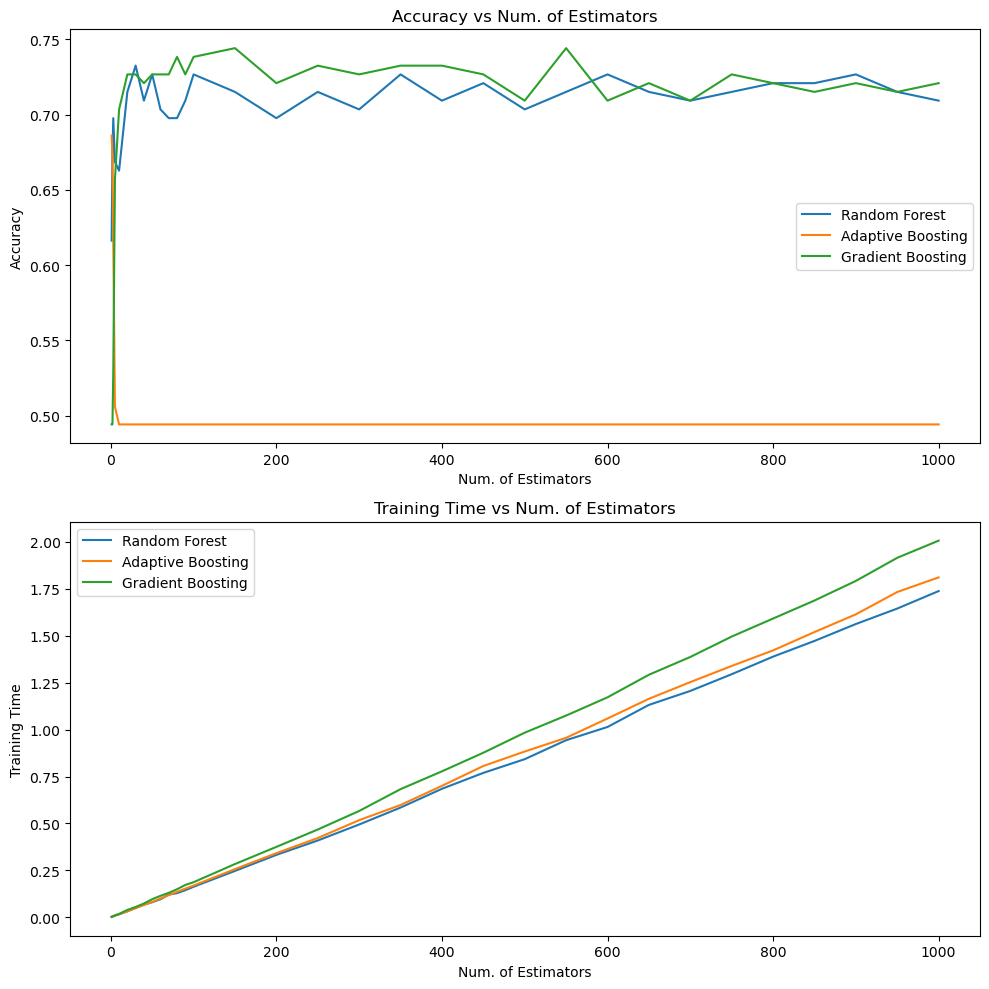

In [756]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axes[0].plot(number_of_estimators, forest_accs, label='Random Forest')
axes[0].plot(number_of_estimators, ada_accs, label='Adaptive Boosting')
axes[0].plot(number_of_estimators, grad_boost_accs, label='Gradient Boosting')
axes[0].set_title('Accuracy vs Num. of Estimators')
axes[0].set_xlabel('Num. of Estimators')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(number_of_estimators, forest_times, label='Random Forest')
axes[1].plot(number_of_estimators, ada_times, label='Adaptive Boosting')
axes[1].plot(number_of_estimators, grad_boost_times, label='Gradient Boosting')
axes[1].set_title('Training Time vs Num. of Estimators')
axes[1].set_xlabel('Num. of Estimators')
axes[1].set_ylabel('Training Time')
axes[1].legend()

plt.tight_layout()
plt.show()

In [758]:
# MSEs

forest_mses, ada_mses, grad_boost_mses = [], [], []
forest_times, ada_times, grad_boost_times = [], [], []

for num_est in number_of_estimators:
    print(num_est, end=" ")
    
    # Random Forest
    my_rand_for_classifier = RandomForRegressor(
        num_estimators = num_est, 
        sample_fraction = 0.5, 
        bootstrap_en = False, 
        min_samples_split = 5,
        min_samples_leaf = 5
    )
    
    start_time = time.time()
    my_rand_for_classifier.fit(hous_X_train, hous_y_train)
    end_time = time.time()
    forest_times.append(end_time - start_time)
    
    y_pred = my_rand_for_classifier.predict(hous_X_test)
    forest_mses.append(mean_squared_error(y_pred, hous_y_test))
    

    # Ada Boost
    my_ada_classifier = AdaBoostRegressor(num_estimators = num_est, max_tree_depth = 3)
    
    start_time = time.time()
    my_ada_classifier.fit(hous_X_train, hous_y_train)
    end_time = time.time()
    ada_times.append(end_time - start_time)
    
    y_pred = my_ada_classifier.predict(hous_X_test)
    ada_mses.append(mean_squared_error(y_pred, hous_y_test))
    
    # Gradient Boosting
    my_gboot_classifier = GradientBoostingRegression(num_estimators=num_est, max_tree_depth=5)

    start_time = time.time()
    my_gboot_classifier.fit(hous_X_train, hous_y_train)
    end_time = time.time()
    grad_boost_times.append(end_time - start_time)

    y_pred = my_gboot_classifier.predict(hous_X_test)
    grad_boost_mses.append(mean_squared_error(y_pred, hous_y_test))

1 2 3 5 10 20 30 40 50 60 70 80 90 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 

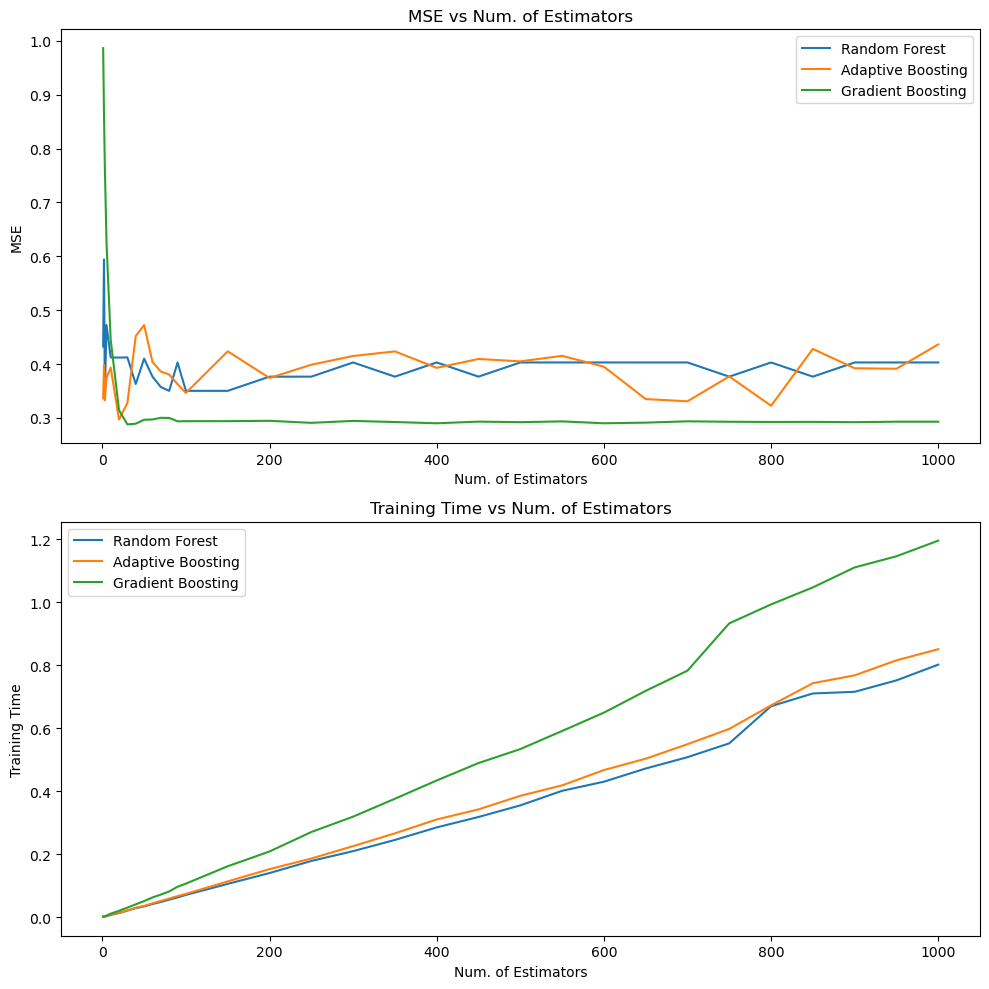

In [759]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axes[0].plot(number_of_estimators, forest_mses, label='Random Forest')
axes[0].plot(number_of_estimators, ada_mses, label='Adaptive Boosting')
axes[0].plot(number_of_estimators, grad_boost_mses, label='Gradient Boosting')
axes[0].set_title('MSE vs Num. of Estimators')
axes[0].set_xlabel('Num. of Estimators')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(number_of_estimators, forest_times, label='Random Forest')
axes[1].plot(number_of_estimators, ada_times, label='Adaptive Boosting')
axes[1].plot(number_of_estimators, grad_boost_times, label='Gradient Boosting')
axes[1].set_title('Training Time vs Num. of Estimators')
axes[1].set_xlabel('Num. of Estimators')
axes[1].set_ylabel('Training Time')
axes[1].legend()

plt.tight_layout()
plt.show()

### Provide an analysis of the mistakes of these models and try to explore and explain the feature similarity of the common mistakes

_Random Forests_
1. Overfitting: Forests are prone to overfitting, especially when the number of estimators (trees) is very high.
2. Computational Intensity: Training a large number of decision trees can be computationally intensive

_AdaBoost with Decision Trees_
1. Sensitivity to Noisy Data: AdaBoost is sensitive to noisy data and outliers as it tries to fit the weak learners to all data points, including outliers.
2. Overfitting Some Learners: If weak learners are too complex (e.g., deep decision trees), AdaBoost can overfit to the training data.

_Gradient Boosted Decision Trees_
1. Overfitting: Gradient Boosting tends to overfit when the number of estimators is too high or when weak learners are too complex.
2. Sensitivity to Hyperparameters: Proper tuning of hyperparameters such as learning rate and tree depth is crucial for preventing overfitting or underfitting.


_Common Mistakes Across Models_
1. Overfitting
2. Weak Learner Complexity: All models use decision trees as weak learners, and if these trees are too complex, the models can overfit.
3. Sensitivity to Noisy Data: Both AdaBoost and Gradient Boosting are sensitive to noisy data

    We can also present a few confusion matrices

In [760]:
from sklearn.metrics import confusion_matrix


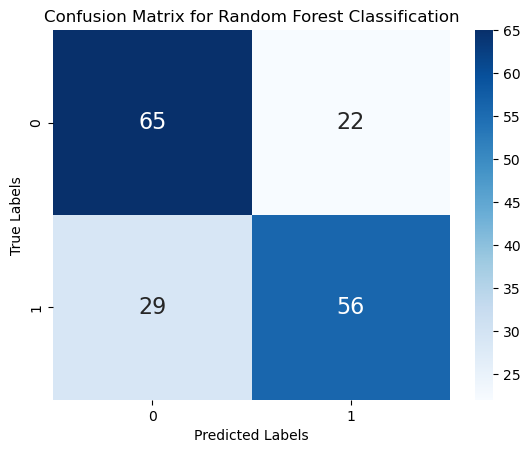

In [761]:
my_rand_for_classifier = RandomForClassifier(
    num_estimators = 180, 
    sample_fraction = 0.5, 
    bootstrap_en = False, 
    min_samples_split = 5,
    min_samples_leaf = 5
)

start_time = time.time()
my_rand_for_classifier.fit(wine_X_train, wine_y_train)
end_time = time.time()
forest_times.append(end_time - start_time)

y_pred = my_rand_for_classifier.predict(wine_X_test)

cm = confusion_matrix(wine_y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classification')
plt.show()

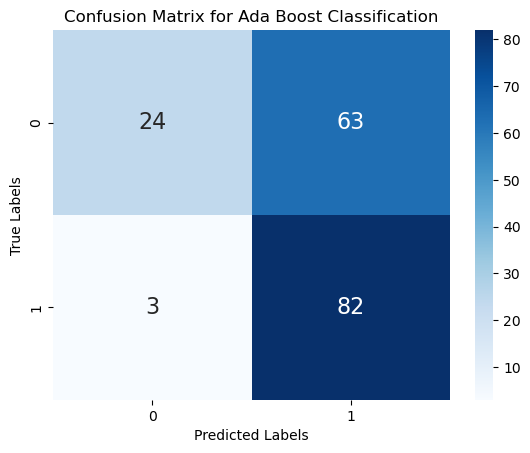

In [764]:
my_ada_classifier = AdaBoostClassifier(num_estimators = 3, max_tree_depth = 3)

start_time = time.time()
my_ada_classifier.fit(wine_X_train, wine_y_train)
end_time = time.time()
ada_times.append(end_time - start_time)

y_pred = my_ada_classifier.predict(wine_X_test)

cm = confusion_matrix(wine_y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Ada Boost Classification')
plt.show()

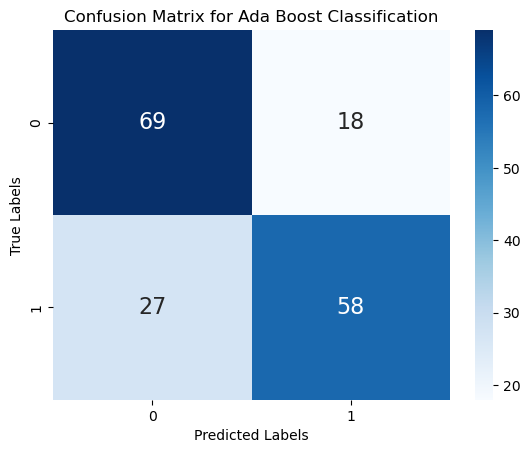

In [768]:
my_gboot_classifier = GradientBoostingClassifier(num_estimators=180, tree_max_depth=5)

start_time = time.time()
my_gboot_classifier.fit(wine_X_train, wine_y_train)
end_time = time.time()
grad_boost_times.append(end_time - start_time)

y_pred = my_gboot_classifier.predict(wine_X_test)

cm = confusion_matrix(wine_y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Ada Boost Classification')
plt.show()

_Random Forests_
1. Overfitting: Forests are prone to overfitting, especially when the number of estimators (trees) is very high.
2. Computational Intensity: Training a large number of decision trees can be computationally intensive

_AdaBoost with Decision Trees_
1. Sensitivity to Noisy Data: AdaBoost is sensitive to noisy data and outliers as it tries to fit the weak learners to all data points, including outliers.
2. Overfitting Some Learners: If weak learners are too complex (e.g., deep decision trees), AdaBoost can overfit to the training data.

_Gradient Boosted Decision Trees_
1. Overfitting: Gradient Boosting tends to overfit when the number of estimators is too high or when weak learners are too complex.
2. Sensitivity to Hyperparameters: Proper tuning of hyperparameters such as learning rate and tree depth is crucial for preventing overfitting or underfitting.


_Common Mistakes Across Models_
1. Overfitting
2. Weak Learner Complexity: All models use decision trees as weak learners, and if these trees are too complex, the models can overfit.
3. Sensitivity to Noisy Data: Both AdaBoost and Gradient Boosting are sensitive to noisy data